# 2.6. Probability and Statistics

## Introduction

Probability theory provides the mathematical foundation for reasoning under uncertainty. In machine learning, we rarely have complete information—instead, we make predictions based on incomplete or noisy data. Probability gives us tools to quantify uncertainty and learn from data.

Statistical methods extend probability theory to analyze real-world data, estimate parameters, and make predictions. Together, they form the backbone of modern data science.

**Key Questions:**
- How do we formally model uncertainty?
- How can we update beliefs when observing new evidence?
- How do we make optimal decisions under uncertainty?

## Motivating Example: Spam Classification

Instead of deterministic rules, we compute:

$$P(\text{spam} | \text{words in email})$$

Using **Bayes' Theorem**:

$$P(\text{spam}|\text{words}) = \frac{P(\text{words}|\text{spam}) \cdot P(\text{spam})}{P(\text{words})}$$

This allows us to quantify uncertainty, update beliefs with new evidence, and learn from data systematically.

## Applications in Computer Science

| Domain | Applications |
|--------|-------------|
| **Machine Learning** | Classification, regression, Bayesian networks |
| **NLP** | Language models, translation, speech recognition |
| **Computer Vision** | Object recognition, image generation (GANs, VAEs) |
| **Search & Recommendations** | Document ranking, collaborative filtering |
| **Cybersecurity** | Anomaly detection, intrusion detection |
| **Algorithms** | Randomized algorithms, Bloom filters |
| **Reinforcement Learning** | MDPs, exploration-exploitation |



In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

print("2.6. Probability and Statistics - D2L")
print("="*50)
print("Environment initialized successfully")

2.6. Probability and Statistics - D2L
Environment initialized successfully


## Concrete Example: Dice Rolling Simulation

Demonstrating probability concepts using a fair die:
- **Prior probability**: Each face has $P = \frac{1}{6}$
- **Law of Large Numbers**: Frequencies converge to true probabilities
- **Expectation**: $E[X] = \sum_{i=1}^{6} i \cdot P(X=i) = 3.5$
- **Variance**: $Var(X) = E[X^2] - (E[X])^2$

DICE ROLLING DEMONSTRATION

Probability Distribution:
Face       P(Face)        
------------------------------------------------------------
1          0.1667
2          0.1667
3          0.1667
4          0.1667
5          0.1667
6          0.1667

SIMULATION RESULTS

Single roll result: [0, 1, 0, 0, 0, 0]
10 rolls count: [2, 2, 0, 1, 1, 4]
1000 rolls frequency: [0.158, 0.191, 0.165, 0.162, 0.169, 0.155]


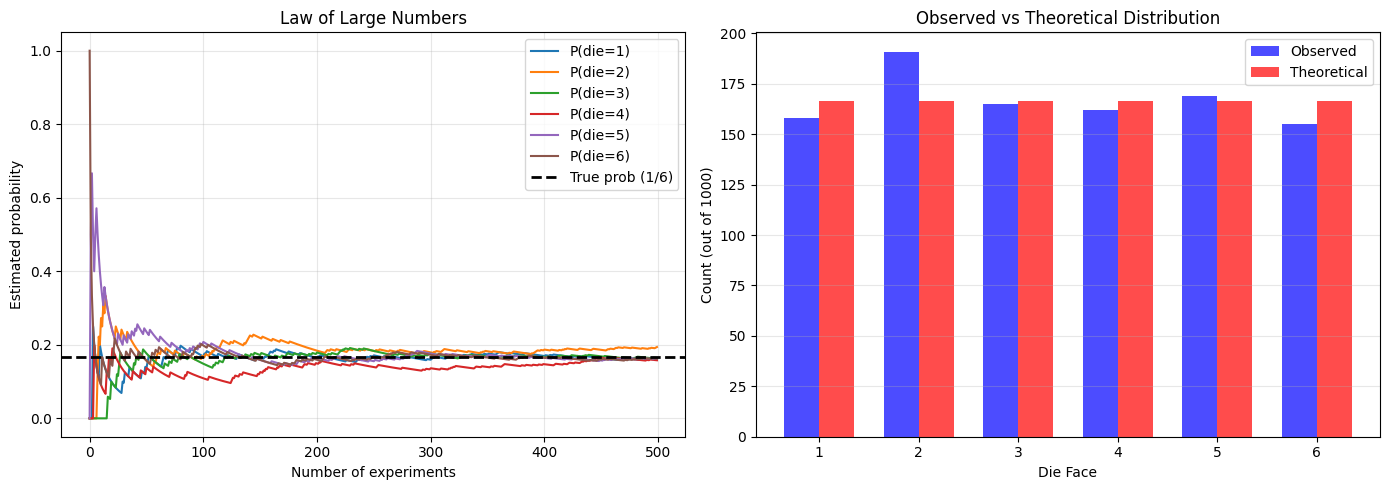


SUMMARY STATISTICS
E[X] = 3.5000
Var(X) = 2.9167
Std(X) = 1.7078


In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Fair dice - equal probability for each face
fair_probs = np.ones(6) / 6

print("="*60)
print("DICE ROLLING DEMONSTRATION")
print("="*60)

print("\nProbability Distribution:")
print(f"{'Face':<10} {'P(Face)':<15}")
print("-"*60)
for i in range(6):
    print(f"{i+1:<10} {fair_probs[i]:.4f}")

# Simulate rolling dice
print("\n" + "="*60)
print("SIMULATION RESULTS")
print("="*60)

# Single roll
single_roll = np.random.multinomial(1, fair_probs)
print(f"\nSingle roll result: {single_roll.tolist()}")

# 10 rolls
ten_rolls = np.random.multinomial(10, fair_probs)
print(f"10 rolls count: {ten_rolls.tolist()}")

# 1000 rolls
thousand_rolls = np.random.multinomial(1000, fair_probs)
print(f"1000 rolls frequency: {(thousand_rolls/1000).tolist()}")

# Law of Large Numbers visualization
counts = np.array([np.random.multinomial(1, fair_probs) for _ in range(500)])
cum_counts = counts.cumsum(axis=0)
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Convergence to true probability
for i in range(6):
    ax1.plot(estimates[:, i], label=f'P(die={i+1})')
ax1.axhline(y=1/6, color='black', linestyle='dashed', linewidth=2, label='True prob (1/6)')
ax1.set_xlabel('Number of experiments')
ax1.set_ylabel('Estimated probability')
ax1.set_title('Law of Large Numbers')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: Final distribution vs theoretical
final_counts = thousand_rolls
faces = [1, 2, 3, 4, 5, 6]
theoretical = [1000/6] * 6

x = range(6)
width = 0.35
ax2.bar([i - width/2 for i in x], final_counts, width, label='Observed', color='blue', alpha=0.7)
ax2.bar([i + width/2 for i in x], theoretical, width, label='Theoretical', color='red', alpha=0.7)
ax2.set_xlabel('Die Face')
ax2.set_ylabel('Count (out of 1000)')
ax2.set_title('Observed vs Theoretical Distribution')
ax2.set_xticks(x)
ax2.set_xticklabels(faces)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Expectation and Variance
values = np.arange(1, 7, dtype=np.float32)
expectation = (values * fair_probs).sum()
expectation_x2 = ((values ** 2) * fair_probs).sum()
variance = expectation_x2 - expectation ** 2

print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
print(f"E[X] = {expectation:.4f}")
print(f"Var(X) = {variance:.4f}")
print(f"Std(X) = {np.sqrt(variance):.4f}")
print("="*60)

## Section 1: Core Definitions and Axioms of Probability

### 1.1 Sample Space and Events

**Definition 1.1 (Sample Space):**
The **sample space**, denoted $\mathcal{S}$ (or sometimes $\Omega$), is the set of all possible outcomes of a random experiment.

**Definition 1.2 (Event):**
An **event** $\mathcal{A}$ is a subset of the sample space: $\mathcal{A} \subseteq \mathcal{S}$.

**Definition 1.3 (Event Occurrence):**
We say that event $\mathcal{A}$ has occurred if and only if the realized outcome $z$ satisfies $z \in \mathcal{A}$.

**Examples:**
- Coin flip: $\mathcal{S} = \{\text{Heads}, \text{Tails}\}$
- Die roll: $\mathcal{S} = \{1, 2, 3, 4, 5, 6\}$
- Temperature measurement: $\mathcal{S} = \mathbb{R}$

**Reviewer's Commentary:**
- These definitions are standard and correct.
- The notation $\mathcal{S}$ for sample space is conventional (alternative notations include $\Omega$ or $S$).
- Events form a $\sigma$-algebra (discussed in Section 12).

### 1.2 Kolmogorov Axioms of Probability

**Definition 1.4 (Probability Function):**
A **probability function** (or probability measure) is a function
$$P: \mathcal{F} \to [0,1]$$
where $\mathcal{F}$ is a $\sigma$-algebra of events on $\mathcal{S}$, that satisfies the following three axioms:

**Axiom 1 (Non-negativity):** For any event $\mathcal{A} \in \mathcal{F}$,
$$P(\mathcal{A}) \geq 0$$

**Axiom 2 (Normalization):** The probability of the entire sample space is 1:
$$P(\mathcal{S}) = 1$$

**Axiom 3 (Countable Additivity):** For any countable collection of **mutually exclusive** (disjoint) events $\{\mathcal{A}_i\}_{i=1}^{\infty}$ where $\mathcal{A}_i \cap \mathcal{A}_j = \emptyset$ for all $i \neq j$,
$$P\left(\bigcup_{i=1}^{\infty} \mathcal{A}_i\right) = \sum_{i=1}^{\infty} P(\mathcal{A}_i)$$

**Reviewer's Commentary:**
- These are the **Kolmogorov axioms**, the foundation of modern probability theory (1933).
- **Critical requirement:** Axiom 3 requires that events be **mutually exclusive** (disjoint). This condition must be stated explicitly.
- For finite cases, we often use the simpler finite additivity: $P(A \cup B) = P(A) + P(B)$ when $A \cap B = \emptyset$.

### 1.3 Immediate Consequences of the Axioms

**Theorem 1.1 (Probability of Empty Set):**
$$P(\emptyset) = 0$$

**Proof:**

**Step 1:** Consider the sample space $\mathcal{S}$ and the empty set $\emptyset$.

**Step 2:** Note that $\mathcal{S} \cap \emptyset = \emptyset$ and $\mathcal{S} \cup \emptyset = \mathcal{S}$.

*This follows from the definition of the empty set.*

**Step 3:** Therefore $\mathcal{S}$ and $\emptyset$ are disjoint events.

*This follows directly from Step 2.*

**Step 4:** By Axiom 3 (countable additivity with $n=2$):
$$P(\mathcal{S} \cup \emptyset) = P(\mathcal{S}) + P(\emptyset)$$

*The additivity axiom applies since the events are disjoint.*

**Step 5:** Simplify the left side using $\mathcal{S} \cup \emptyset = \mathcal{S}$:
$$P(\mathcal{S}) = P(\mathcal{S}) + P(\emptyset)$$

**Step 6:** Subtract $P(\mathcal{S})$ from both sides:
$$0 = P(\emptyset)$$

Therefore $P(\emptyset) = 0$. 

**Theorem 1.2 (Complement Rule):**
For any event $\mathcal{A}$ and its complement $\mathcal{A}^c = \mathcal{S} \setminus \mathcal{A}$,
$$P(\mathcal{A}) + P(\mathcal{A}^c) = 1$$

**Proof:**

**Step 1:** By definition of complement, $\mathcal{A} \cap \mathcal{A}^c = \emptyset$.

*An event and its complement are disjoint by definition.*

**Step 2:** Also by definition of complement, $\mathcal{A} \cup \mathcal{A}^c = \mathcal{S}$.

*An event and its complement together partition the sample space.*

**Step 3:** Since $\mathcal{A}$ and $\mathcal{A}^c$ are disjoint, by Axiom 3:
$$P(\mathcal{A} \cup \mathcal{A}^c) = P(\mathcal{A}) + P(\mathcal{A}^c)$$

**Step 4:** Substitute from Step 2:
$$P(\mathcal{S}) = P(\mathcal{A}) + P(\mathcal{A}^c)$$

**Step 5:** By Axiom 2, $P(\mathcal{S}) = 1$, therefore:
$$1 = P(\mathcal{A}) + P(\mathcal{A}^c)$$

Therefore $P(\mathcal{A}) + P(\mathcal{A}^c) = 1$. 

**Corollary 1.2.1:**
$$P(\mathcal{A}^c) = 1 - P(\mathcal{A})$$

**Theorem 1.3 (Monotonicity):**
If $\mathcal{A} \subseteq \mathcal{B}$, then $P(\mathcal{A}) \leq P(\mathcal{B})$.

**Proof:**

**Step 1:** Write $\mathcal{B} = \mathcal{A} \cup (\mathcal{B} \setminus \mathcal{A})$.

*Any set can be decomposed into a subset and its relative complement.*

**Step 2:** Note that $\mathcal{A}$ and $\mathcal{B} \setminus \mathcal{A}$ are disjoint.

**Step 3:** By Axiom 3:
$$P(\mathcal{B}) = P(\mathcal{A}) + P(\mathcal{B} \setminus \mathcal{A})$$

**Step 4:** By Axiom 1, $P(\mathcal{B} \setminus \mathcal{A}) \geq 0$.

**Step 5:** Therefore:
$$P(\mathcal{B}) = P(\mathcal{A}) + P(\mathcal{B} \setminus \mathcal{A}) \geq P(\mathcal{A})$$



---

## Section 2: Random Variables

### 2.1 What is a Random Variable?

A random variable provides a mathematical framework for mapping outcomes from a sample space to numerical values, enabling quantitative analysis.

**Definition 2.1 Random Variable:** Random variables are mappings from an underlying sample space to a set of (possibly many) values.

**Intuition:** A random variable assigns a number to each possible outcome of a random experiment.

**Example 1: Coin Toss**

Consider a coin flip experiment where the sample space is $\mathcal{S} = \{\text{Heads}, \text{Tails}\}$.

Define a random variable $X$ that maps:
- Heads → 1
- Tails → 0

This encoding enables mathematical operations such as computing averages.

**Example 2: Rolling a Die**

When rolling a die, define $X$ to be the number showing on the top face.

The random variable takes values in $\{1, 2, 3, 4, 5, 6\}$.

**Two Types of Random Variables:**

| Type | Description | Examples |
|------|-------------|----------|
| **Discrete** | Countable values | Coin flips, dice rolls, number of customers |
| **Continuous** | Any value in a range | Height, weight, temperature, time |

### 2.2 Probability Mass Function (PMF) and Probability Density Function (PDF)

**Definition 2.2 (Probability Mass Function):**
For a discrete random variable $X$, the **probability mass function (PMF)** is:
$$p_X(x) = P(X = x)$$

**Properties of PMF:**
1. $p_X(x) \geq 0$ for all $x$
2. $\sum_{x} p_X(x) = 1$

**Definition 2.3 (Probability Density Function):**
For a continuous random variable $X$, the **probability density function (PDF)** is a function $f_X(x)$ such that:
$$P(a \leq X \leq b) = \int_a^b f_X(x) \, dx$$

**Properties of PDF:**
1. $f_X(x) \geq 0$ for all $x$
2. $\int_{-\infty}^{\infty} f_X(x) \, dx = 1$

**Important Note:** For continuous random variables, $P(X = x) = 0$ for any specific value $x$. We can only compute probabilities for intervals.

### 2.3 Example: The Fair Coin Toss

Consider a fair coin flip experiment.

**Setup:**
- Fair coin with equal probability of heads or tails
- Sample space: $\mathcal{S} = \{\text{Heads}, \text{Tails}\}$

**Step 1: Define a Random Variable**

Define $X = 1$ if Heads, and $X = 0$ if Tails.

Thus:
- $P(X = 1) = 0.5$ (probability of heads)
- $P(X = 0) = 0.5$ (probability of tails)

**Step 2: Calculate the Expected Value**

The expected value is computed as:

$$E[X] = \sum_{x} x \cdot P(X = x) = (1)(0.5) + (0)(0.5) = 0.5$$

**Interpretation:** As the number of flips approaches infinity, the sample average converges to 0.5.

**Step 3: Calculate the Variance**

Variance measures the dispersion of the distribution:

Using the formula: $\text{Var}[X] = E[X^2] - (E[X])^2$

First, compute $E[X^2]$:
$$E[X^2] = (1^2)(0.5) + (0^2)(0.5) = 0.5$$

Then:
$$\text{Var}[X] = 0.5 - (0.5)^2 = 0.5 - 0.25 = 0.25$$

Standard deviation:
$$\sigma = \sqrt{0.25} = 0.5$$

**Interpretation:** The dispersion is maximal for a Bernoulli random variable, as the outcomes are binary with equal probability.

### 2.4 Example: Two Coin Tosses

**Sample space:** $\mathcal{S} = \{HH, HT, TH, TT\}$

Define $Y$ to be the total number of heads. The random variable takes values in $\{0, 1, 2\}$.

**Probabilities:**
- $P(Y = 0) = 1/4$ (both tails: TT)
- $P(Y = 1) = 2/4 = 1/2$ (one head: HT or TH)
- $P(Y = 2) = 1/4$ (both heads: HH)

**Expected Value:**
$$E[Y] = (0)(1/4) + (1)(1/2) + (2)(1/4) = 0 + 0.5 + 0.5 = 1$$

The expected number of heads is 1.

**Variance:**
$$E[Y^2] = (0^2)(1/4) + (1^2)(1/2) + (2^2)(1/4) = 0 + 0.5 + 1 = 1.5$$

$$\text{Var}[Y] = 1.5 - (1)^2 = 1.5 - 1 = 0.5$$

**Observation:** For 1 coin, $E[X] = 0.5$ and for 2 coins, $E[Y] = 1 = 2 \times 0.5$. This demonstrates the **linearity of expectation** property.

### 2.5 Additional Examples

#### Example 1: Weather Forecasting

When a forecast indicates "30% chance of rain tomorrow," this denotes a probability assignment.

**Sample Space:** $\mathcal{S} = \{\text{Rain}, \text{No Rain}\}$

**Probabilities:**
- $P(\text{Rain}) = 0.3$
- $P(\text{No Rain}) = 0.7$

Define $X = 1$ if it rains, $X = 0$ otherwise.

**Expected value:**
$$E[X] = (1)(0.3) + (0)(0.7) = 0.3$$

**Interpretation:** Under frequentist interpretation, if there were 100 days with identical atmospheric conditions, rain would occur on approximately 30 of them.

---

#### Example 2: Exam Scores

Suppose exam performance follows this distribution:
- Score 90-100: probability 0.4
- Score 70-89: probability 0.5
- Score 60-69: probability 0.1

Using the midpoint of each range:

$$E[\text{Score}] = (95)(0.4) + (80)(0.5) + (65)(0.1) = 38 + 40 + 6.5 = 84.5$$

Expected score: 84.5

**Variance calculation:**
$$E[\text{Score}^2] = (95^2)(0.4) + (80^2)(0.5) + (65^2)(0.1) = 3610 + 3200 + 422.5 = 7232.5$$

$$\text{Var}[\text{Score}] = 7232.5 - (84.5)^2 = 7232.5 - 7140.25 = 92.25$$

$$\sigma = \sqrt{92.25} \approx 9.6$$

**Interpretation:** The standard deviation of approximately 10 points indicates the typical deviation from the expected score.

---

#### Example 3: Probabilistic Reward System

A reward system has:
- Common item (value 1): 70% probability
- Rare item (value 5): 25% probability
- Legendary item (value 50): 5% probability

**Expected value:**
$$E[X] = (1)(0.70) + (5)(0.25) + (50)(0.05) = 0.70 + 1.25 + 2.50 = 4.45$$

Each trial has an expected value of 4.45 units.

**Variance:**
$$E[X^2] = (1^2)(0.70) + (5^2)(0.25) + (50^2)(0.05) = 0.70 + 6.25 + 125 = 131.95$$

$$\text{Var}[X] = 131.95 - (4.45)^2 = 131.95 - 19.80 = 112.15$$

$$\sigma = \sqrt{112.15} \approx 10.59$$

**Analysis:** The high variance (112.15) relative to the mean (4.45) indicates significant variability in outcomes. Most trials yield low values, while rare high-value outcomes substantially influence the expected value.

---

## Section 3: Joint and Conditional Probability

### 3.1 Joint Probability

**Definition 3.1 (Joint Probability):**
For two random variables $A$ and $B$, the **joint probability** is:
$$P(A = a, B = b)$$
which represents the probability that both events $\{A = a\}$ and $\{B = b\}$ occur simultaneously.

**Alternative notation:** $P(A = a \cap B = b)$ or $P(A = a \text{ and } B = b)$

**Theorem 3.1 (Joint Probability Bounds)**

$$P(A = a, B = b) \leq P(A = a) \text{ and } P(A = a, B = b) \leq P(B = b) \tag{2.6.1}$$

**Proof of first inequality:**

**Step 1:** Partition the event $\{A = a\}$ based on all possible values of $B$:
$$\{A = a\} = \bigcup_{v \in \text{Val}(B)} \{A = a, B = v\}$$

*This follows from the law of total probability.*

**Step 2:** The events $\{A = a, B = v\}$ for different values of $v$ are mutually exclusive.

*$B$ cannot take two different values simultaneously.*

**Step 3:** Apply Axiom 3 (countable additivity):
$$P(A = a) = \sum_{v \in \text{Val}(B)} P(A = a, B = v)$$

**Step 4:** Since all probabilities are non-negative (Axiom 1), each term in the sum is $\geq 0$:
$$P(A = a) = P(A = a, B = b) + \sum_{v \neq b} P(A = a, B = v) \geq P(A = a, B = b)$$

Therefore $P(A = a, B = b) \leq P(A = a)$. The proof for the second inequality is symmetric. 

### 3.2 Conditional Probability

**Definition 3.2 (Conditional Probability):**
The **conditional probability** of event $B = b$ given that event $A = a$ has occurred is defined as:

$$P(B = b \mid A = a) = \frac{P(A = a, B = b)}{P(A = a)}, \text{ where } P(A = a) > 0 \tag{2.6.2}$$

**Interpretation:**
- We restrict our sample space to outcomes where $A = a$ occurred
- We renormalize probabilities so they sum to 1 over this restricted space
- The conditional probability measures the likelihood of $B = b$ within this restricted space

**Important Condition:** This definition is only valid when $P(A = a) > 0$. If $P(A = a) = 0$, conditional probability is undefined (division by zero).

**Example:**

Roll a fair die. Let:
- $A$ = "roll is even" = $\{2, 4, 6\}$
- $B$ = "roll is greater than 3" = $\{4, 5, 6\}$

Then:
- $P(A) = 3/6 = 1/2$
- $P(B) = 3/6 = 1/2$
- $P(A \cap B) = P(\{4, 6\}) = 2/6 = 1/3$

$$P(B \mid A) = \frac{P(A \cap B)}{P(A)} = \frac{1/3}{1/2} = \frac{2}{3}$$

Given that the roll is even, there's a 2/3 chance it's greater than 3.

### 3.3 Verification that Conditional Probability is a Valid Probability

**Theorem 3.2:** For fixed $A = a$ with $P(A = a) > 0$, the function $Q(B = b) = P(B = b \mid A = a)$ satisfies all probability axioms.

**Proof:**

**Axiom 1 (Non-negativity):**

**Step 1:** By definition:
$$Q(B = b) = P(B = b \mid A = a) = \frac{P(A = a, B = b)}{P(A = a)}$$

**Step 2:** The numerator satisfies $P(A = a, B = b) \geq 0$ (by Axiom 1).

**Step 3:** The denominator satisfies $P(A = a) > 0$ (given assumption).

**Step 4:** Therefore:
$$Q(B = b) = \frac{P(A = a, B = b)}{P(A = a)} \geq 0$$

**Axiom 2 (Normalization):**

**Step 1:** Sum over all possible values of $B$:
$$\sum_{b} Q(B = b) = \sum_{b} \frac{P(A = a, B = b)}{P(A = a)}$$

**Step 2:** Factor out constant denominator:
$$= \frac{1}{P(A = a)} \sum_{b} P(A = a, B = b)$$

**Step 3:** By marginalization:
$$= \frac{1}{P(A = a)} \cdot P(A = a) = 1$$

**Axiom 3 (Additivity):** Similar verification for disjoint events.

Therefore, conditional probability defines a valid probability measure.

### 3.4 Marginalization (Law of Total Probability)

**Theorem 3.3 (Marginalization):**
For random variables $A$ and $B$:
$$P(A = a) = \sum_{v \in \text{Val}(B)} P(A = a, B = v)$$

**Proof:** This was proven in Theorem 3.1.

**Theorem 3.4 (Law of Total Probability):**

$$\sum_a P(B \mid A = a)P(A = a) = \sum_a P(B, A = a) = P(B) \tag{2.6.6}$$

**Proof:**

**Step 1:** Start with the marginalization formula for $P(B)$:
$$P(B) = \sum_a P(A = a, B)$$

**Step 2:** Apply the definition of conditional probability to each term:
$$P(A = a, B) = P(B \mid A = a)P(A = a)$$

This assumes $P(A = a) > 0$.

**Step 3:** Substitute into Step 1:
$$P(B) = \sum_a P(B \mid A = a)P(A = a)$$

**Note:** For values $a$ where $P(A = a) = 0$, the term contributes 0 to the sum.

**Intuition:** To find the probability of $B$, sum over all possible "paths" through values of $A$.

---

## Section 4: Bayes' Theorem

### 4.1 Derivation of Bayes' Theorem

**Theorem 4.1 (Bayes' Theorem - Basic Form):**
For events $A$ and $B$ with $P(A) > 0$ and $P(B) > 0$:
$$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)} \tag{2.6.3}$$



**Proof:**

**Step 1:** By definition of conditional probability:
$$P(A \mid B) = \frac{P(A, B)}{P(B)}$$

*This is valid when $P(B) > 0$.*

**Step 2:** Note that joint probability is symmetric:
$$P(A, B) = P(B, A)$$

*$P(A \cap B) = P(B \cap A)$.*

**Step 3:** Apply definition of conditional probability to express joint probability:
$$P(B, A) = P(B \mid A) P(A)$$

*This is valid when $P(A) > 0$.*

**Step 4:** Combine Steps 2 and 3:
$$P(A, B) = P(B \mid A) P(A)$$

**Step 5:** Substitute Step 4 into Step 1:
$$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}$$

Therefore Bayes' theorem is established.

**Corollary 4.1.1 (Proportional Form of Bayes' Theorem)**

When we don't have direct access to $P(B)$, a simplified version of Bayes' theorem comes in handy:

$$P(A \mid B) \propto P(B \mid A)P(A) \tag{2.6.4}$$

**Interpretation:** The posterior is *proportional to* likelihood times prior.

**Corollary 4.1.2 (Normalized Form)**

Since we know that $P(A \mid B)$ must be normalized to 1, i.e., $\sum_a P(A = a \mid B) = 1$, we can compute:

$$P(A \mid B) = \frac{P(B \mid A)P(A)}{\sum_a P(B \mid A = a)P(A = a)} \tag{2.6.5}$$

**Note:** The denominator is the normalization constant, which equals $P(B)$ by the Law of Total Probability.

### 4.2 Terminology and Interpretation

In Bayes' theorem:

$$P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)}$$

**Components:**

- **$P(A)$ - Prior:** What we believed BEFORE seeing evidence
- **$P(B \mid A)$ - Likelihood:** How likely is the evidence if our belief is true?
- **$P(B)$ - Marginal/Evidence:** How likely is the evidence overall?
- **$P(A \mid B)$ - Posterior:** What we believe AFTER seeing evidence

**The Big Idea:** Bayes' theorem tells us how to update our beliefs when we get new information.

### 4.3 Example: Friend Attendance Prediction

**Situation:** Consider a friend who states they will attend a party. Historical data shows:
- When they actually attend, they always confirm attendance: $P(\text{Says Yes} \mid \text{Comes}) = 1.0$
- Actual attendance rate: $P(\text{Comes}) = 0.3$
- Confirmation rate: $P(\text{Says Yes}) = 0.8$

**Question:** Given confirmation, compute the probability of actual attendance.

**Using Bayes' theorem:**
$$P(\text{Comes} \mid \text{Says Yes}) = \frac{P(\text{Says Yes} \mid \text{Comes}) \cdot P(\text{Comes})}{P(\text{Says Yes})}$$

$$= \frac{(1.0)(0.3)}{0.8} = \frac{0.3}{0.8} = 0.375 = 37.5\%$$

**Result:** Despite confirmation, the probability of attendance is 37.5%.

**Analysis:** The low posterior probability results from the high base rate of confirmations (80%) relative to the actual attendance rate (30%). Most confirmations do not result in attendance.

---

### 4.4 Example: Email Spam Classification

Email characteristics:
- **Prior:** $P(\text{Spam}) = 0.2$
- **Likelihood:** $P(\text{Contains "FREE MONEY"} \mid \text{Spam}) = 0.9$
- **Marginal:** $P(\text{Contains "FREE MONEY"}) = 0.25$

For an email containing "FREE MONEY", compute:

$$P(\text{Spam} \mid \text{"FREE MONEY"}) = \frac{(0.9)(0.2)}{0.25} = \frac{0.18}{0.25} = 0.72 = 72\%$$

**Result:** The email has a 72% probability of being spam.

**Process:**
1. Prior belief: 20% of emails are spam
2. Evidence observed: "FREE MONEY" present
3. Updated belief (posterior): 72% probability of spam

This exemplifies Bayesian updating, the foundation of spam filters and probabilistic classifiers.

## Section 5: Independence

**Definition 5 (Independence):** Two random variables $A$ and $B$ are **independent** (denoted $A \perp B$) if and only if:

$$P(A, B) = P(A)P(B) \tag{2.6.9}$$

for all values of $A$ and $B$.

**Interpretation:** Knowing $B$ provides no information about $A$ - the occurrence of one event does not affect the probability of the other.

**Example:** Rolling two fair dice

Let $A$ = "first die shows 6" and $B$ = "second die shows 6"

- $P(A) = 1/6$
- $P(B) = 1/6$
- $P(A, B) = 1/36 = (1/6)(1/6) = P(A)P(B)$

Therefore, $A \perp B$ (the two dice are independent).

---

## Section 6: Expectation and Variance

### 6.1 Expectation (Expected Value)

**Definition 6.1 (Expectation - Discrete Case):**
For a discrete random variable $X$ with possible values $x_1, x_2, \ldots$:

$$E[X] = \sum_{i} x_i P(X = x_i) \tag{2.6.12}$$
where the sum is over all possible values of $X$.

**Conditions for existence:** The expectation exists if and only if $\sum_{x} |x| \cdot P(X = x) < \infty$.

**Alternative Notation:** $E[X] = E_{X \sim P}[X] = \mu_X = \mu$
**Theorem 6.1.1 (Expectation of a Function)**

For any function $f$ of a random variable $X$:

$$E[f(X)] = \sum_{i} f(x_i) P(X = x_i) \tag{2.6.13}$$

**Example:** For $f(x) = x^2$:
$$E[X^2] = \sum_{i} x_i^2 P(X = x_i)$$

### 6.2 Properties of Expectation

**Theorem 6.2 (Linearity of Expectation):**
For random variables $X$ and $Y$ and constants $a, b \in \mathbb{R}$:
$$E[aX + bY] = aE[X] + bE[Y]$$

**Proof (Discrete Case):**

**Step 1:** Write the expectation:
$$E[aX + bY] = \sum_{x, y} (ax + by) \cdot P(X = x, Y = y)$$

**Step 2:** Distribute:
$$= \sum_{x, y} ax \cdot P(X = x, Y = y) + \sum_{x, y} by \cdot P(X = x, Y = y)$$

**Step 3:** Factor out constants:
$$= a \sum_{x, y} x \cdot P(X = x, Y = y) + b \sum_{x, y} y \cdot P(X = x, Y = y)$$

**Step 4:** For the first term, marginalize over $y$:
$$\sum_{x, y} x \cdot P(X = x, Y = y) = \sum_{x} x \sum_{y} P(X = x, Y = y) = \sum_{x} x \cdot P(X = x) = E[X]$$

**Step 5:** Similarly for the second term:
$$\sum_{x, y} y \cdot P(X = x, Y = y) = E[Y]$$

**Step 6:** Combine:
$$E[aX + bY] = aE[X] + bE[Y]$$

**Important Note:** Linearity holds **regardless of whether $X$ and $Y$ are independent**. This is a powerful property.

**Corollary:** For constants $a$ and $b$:
- $E[aX] = aE[X]$
- $E[X + b] = E[X] + b$
- $E[a] = a$

### 6.3 Variance

**Definition 5.4 (Variance):**
The variance measures the spread of a random variable around its mean:

$$\text{Var}[X] = E\left[(X - \mu)^2\right] \tag{2.6.14}$$

where $\mu = E[X]$ is the expected value of $X$.

**Alternative Notation:** $\text{Var}[X] = \sigma_X^2 = \sigma^2$

**Theorem 5.2 (Computational Formula for Variance):**

$$\text{Var}[X] = E[X^2] - (E[X])^2 \tag{2.6.15}$$

**Proof:**
$$\begin{aligned}
\text{Var}[X] &= E[(X - \mu)^2] \\
&= E[X^2 - 2\mu X + \mu^2] \\
&= E[X^2] - 2\mu E[X] + \mu^2 \\
&= E[X^2] - 2\mu^2 + \mu^2 \\
&= E[X^2] - \mu^2 \\
&= E[X^2] - (E[X])^2
\end{aligned}$$

**Step 1:** Start with definition:
$$\text{Var}[X] = E\left[(X - E[X])^2\right]$$

**Step 2:** Let $\mu = E[X]$ for notational simplicity:
$$\text{Var}[X] = E\left[(X - \mu)^2\right]$$

**Step 3:** Expand the square:
$$= E\left[X^2 - 2\mu X + \mu^2\right]$$

**Step 4:** Apply linearity of expectation:
$$= E[X^2] - E[2\mu X] + E[\mu^2]$$

**Step 5:** Factor out constants:
$$= E[X^2] - 2\mu E[X] + \mu^2$$

**Step 6:** Substitute $\mu = E[X]$:
$$= E[X^2] - 2E[X] \cdot E[X] + (E[X])^2$$

**Step 7:** Simplify:
$$= E[X^2] - 2(E[X])^2 + (E[X])^2$$

**Step 8:** Combine like terms:
$$= E[X^2] - (E[X])^2$$

Therefore $\text{Var}[X] = E[X^2] - (E[X])^2$. 

**Interpretation:** Variance is the difference between the "mean of squares" and "square of mean."

### 6.4 Properties of Variance

**Theorem 5.3 (Variance of Scaled Random Variable):**
For any constant $c$:
$$\text{Var}[cX] = c^2 \text{Var}[X]$$

**Proof:**

**Step 1:** Use the computational formula:
$$\text{Var}[cX] = E[(cX)^2] - (E[cX])^2$$

**Step 2:** Simplify:
$$= E[c^2 X^2] - (cE[X])^2$$
$$= c^2 E[X^2] - c^2 (E[X])^2$$
$$= c^2 (E[X^2] - (E[X])^2)$$
$$= c^2 \text{Var}[X]$$

**Theorem 5.4 (Variance is Shift-Invariant):**
For any constant $c$:
$$\text{Var}[X + c] = \text{Var}[X]$$

**Proof:**

**Step 1:** Note that $E[X + c] = E[X] + c$.

**Step 2:** Apply definition:
$$\text{Var}[X + c] = E[(X + c - E[X + c])^2] = E[(X + c - E[X] - c)^2] = E[(X - E[X])^2] = \text{Var}[X]$$

**Theorem 5.5 (Variance of Sum - Independent Case):**
If $X$ and $Y$ are **independent**, then:
$$\text{Var}[X + Y] = \text{Var}[X] + \text{Var}[Y]$$

**Note:** This does not hold in general for dependent random variables.

### 6.5 Standard Deviation

**Definition 5.5 (Standard Deviation):**
The **standard deviation** is the square root of variance:
$$\sigma_X = \sqrt{\text{Var}[X]}$$

**Purpose:** Standard deviation is expressed in the same units as the original random variable, making it more interpretable than variance.

**Example:** If $X$ represents height in centimeters:
- $\text{Var}[X]$ has units of cm² (squared centimeters)
- $\sigma_X$ has units of cm (centimeters)

**Properties:**
- $\sigma_X \geq 0$
- $\sigma_{cX} = |c| \sigma_X$
- $\sigma_{X+c} = \sigma_X$

---

## Section 7: Practical Examples

HIV Test Example - Complete Calculation

**Problem Setup:**

**Given Information:**
- Let $H = 1$ denote "has HIV", $H = 0$ denote "does not have HIV"
- Let $D_1 = 1$ denote "first test is positive", $D_1 = 0$ denote "first test is negative"
- Prior probability of having HIV: $P(H = 1) = 0.0015$
- Consequently: $P(H = 0) = 1 - 0.0015 = 0.9985$
- Test sensitivity (true positive rate): $P(D_1 = 1 \mid H = 1) = 1.0$
- False positive rate: $P(D_1 = 1 \mid H = 0) = 0.01$

**Question:** What is the probability of having HIV given a positive test result, i.e., $P(H = 1 \mid D_1 = 1)$?

#### 7.1 Solution - Single Test

**Step 1:** Apply Bayes' theorem:
$$P(H = 1 \mid D_1 = 1) = \frac{P(D_1 = 1 \mid H = 1) P(H = 1)}{P(D_1 = 1)}$$

**Step 2:** Compute $P(D_1 = 1)$ using marginalization:

$$\begin{aligned}
P(D_1 = 1) &= P(D_1 = 1, H = 0) + P(D_1 = 1, H = 1) \\
&= P(D_1 = 1 \mid H = 0)P(H = 0) + P(D_1 = 1 \mid H = 1)P(H = 1) \\
&= 0.01 \times 0.9985 + 1 \times 0.0015 \\
&= 0.011485
\end{aligned} \tag{2.6.7}$$

**Step 3:** Substitute values:
$$P(D_1 = 1) = (0.01)(0.9985) + (1.0)(0.0015)$$

**Step 4:** Compute marginal probability:

$$\begin{aligned}
P(D_1 = 1, D_2 = 1) &= P(D_1 = 1, D_2 = 1 \mid H = 0)P(H = 0) + P(D_1 = 1, D_2 = 1 \mid H = 1)P(H = 1) \\
&= 0.0003 \times 0.9985 + 0.98 \times 0.0015 \\
&= 0.00029955 + 0.00147 \\
&= 0.00176955
\end{aligned} \tag{2.6.10}$$

**Step 5:** Compute the numerator:
$$P(D_1 = 1 \mid H = 1) P(H = 1) = (1.0)(0.0015) = 0.0015$$

**Step 6:** Apply Bayes' theorem:
$$P(H = 1 \mid D_1 = 1) = \frac{P(D_1 = 1 \mid H = 1)P(H = 1)}{P(D_1 = 1)} = \frac{1 \times 0.0015}{0.011485} = 0.1306 \tag{2.6.8}$$

**Conclusion:** There is only a **13.06%** chance the patient actually has HIV, despite testing positive!

**Conclusion:** The probability of actually having HIV given a positive test is approximately **13.06%** or about **1 in 8**.

**Interpretation:** Despite a positive test, the probability of actually having the disease is relatively low because:
1. The disease is rare (low prior: 0.15%)
2. The false positive rate (1%) is much higher than the disease prevalence
3. Most positive tests are false positives, not true positives

#### 7.2 Solution - Two Tests

**Extended Problem:**
A second test is administered with properties:
- Sensitivity: $P(D_2 = 1 \mid H = 1) = 0.98$
- False positive rate: $P(D_2 = 1 \mid H = 0) = 0.03$

**Assumption:** The tests are **conditionally independent given $H$**, meaning:
$$P(D_1 = 1, D_2 = 1 \mid H) = P(D_1 = 1 \mid H) P(D_2 = 1 \mid H)$$

**Question:** What is $P(H = 1 \mid D_1 = 1, D_2 = 1)$?

**Solution:**

**Step 1:** Apply Bayes' theorem:
$$\begin{aligned}
P(D_1 = 1, D_2 = 1 \mid H = 0) &= P(D_1 = 1 \mid H = 0) P(D_2 = 1 \mid H = 0) = 0.01 \times 0.03 = 0.0003 \\
P(D_1 = 1, D_2 = 1 \mid H = 1) &= P(D_1 = 1 \mid H = 1) P(D_2 = 1 \mid H = 1) = 1 \times 0.98 = 0.98
\end{aligned} \tag{2.6.9}$$

**Step 2:** Use conditional independence for $H = 1$:
$$P(D_1 = 1, D_2 = 1 \mid H = 1) = (1.0)(0.98) = 0.98$$

**Step 3:** Use conditional independence for $H = 0$:
$$P(D_1 = 1, D_2 = 1 \mid H = 0) = (0.01)(0.03) = 0.0003$$

**Step 4:** Compute marginal probability:
$$\begin{aligned}
P(D_1 = 1, D_2 = 1) &= P(D_1 = 1, D_2 = 1 \mid H = 0)P(H = 0) + P(D_1 = 1, D_2 = 1 \mid H = 1)P(H = 1) \\
&= 0.0003 \times 0.9985 + 0.98 \times 0.0015 \\
&= 0.00029955 + 0.00147 \\
&= 0.00176955
\end{aligned} \tag{2.6.10}$$


**Step 5:** Compute numerator:
$$P(D_1 = 1, D_2 = 1 \mid H = 1) P(H = 1) = (0.98)(0.0015) = 0.00147$$

**Step 6:** Apply Bayes' theorem:
$$P(H = 1 \mid D_1 = 1, D_2 = 1) = \frac{P(D_1 = 1, D_2 = 1 \mid H = 1) P(H = 1)}{P(D_1 = 1, D_2 = 1)} = \frac{0.98 \times 0.0015}{0.00176955} = 0.8307 \tag{2.6.11}$$


**Conclusion:** With two positive tests, the probability of having HIV increases to approximately **83.07%**.

**Interpretation:** The second positive test provides significant additional evidence, increasing confidence from 13.06% to 83.07%.

In [30]:
# Cell: Verify D2L 2.6 HIV Testing Calculations

# Given probabilities
P_H1 = 0.0015  # P(HIV+)
P_H0 = 1 - P_H1  # P(HIV-)

# Test 1 parameters
P_D1_1_given_H1 = 1.00  # Sensitivity (never misses HIV+)
P_D1_1_given_H0 = 0.01  # False positive rate

# Test 2 parameters (different from Test 1!)
P_D2_1_given_H1 = 0.98
P_D2_1_given_H0 = 0.03

print("="*50)
print("D2L 2.6 HIV Testing Example Verification")
print("="*50)

# Equation (2.6.7): P(D1=1)
P_D1_1 = P_D1_1_given_H0 * P_H0 + P_D1_1_given_H1 * P_H1
print(f"\n(2.6.7) P(D₁=1) = {P_D1_1:.6f}")

# Equation (2.6.8): P(H=1|D1=1)
P_H1_given_D1_1 = (P_D1_1_given_H1 * P_H1) / P_D1_1
print(f"(2.6.8) P(H=1|D₁=1) = {P_H1_given_D1_1:.4f} ({P_H1_given_D1_1*100:.2f}%)")

# Equation (2.6.9): Joint probabilities for two tests
P_D1D2_given_H0 = P_D1_1_given_H0 * P_D2_1_given_H0
P_D1D2_given_H1 = P_D1_1_given_H1 * P_D2_1_given_H1
print(f"\n(2.6.9) P(D₁=1,D₂=1|H=0) = {P_D1D2_given_H0:.4f}")
print(f"(2.6.9) P(D₁=1,D₂=1|H=1) = {P_D1D2_given_H1:.4f}")

# Equation (2.6.10): P(D1=1, D2=1)
P_D1D2 = P_D1D2_given_H0 * P_H0 + P_D1D2_given_H1 * P_H1
print(f"\n(2.6.10) P(D₁=1,D₂=1) = {P_D1D2:.8f}")

# Equation (2.6.11): P(H=1|D1=1,D2=1)
P_H1_given_D1D2 = (P_D1D2_given_H1 * P_H1) / P_D1D2
print(f"(2.6.11) P(H=1|D₁=1,D₂=1) = {P_H1_given_D1D2:.4f} ({P_H1_given_D1D2*100:.2f}%)")

D2L 2.6 HIV Testing Example Verification

(2.6.7) P(D₁=1) = 0.011485
(2.6.8) P(H=1|D₁=1) = 0.1306 (13.06%)

(2.6.9) P(D₁=1,D₂=1|H=0) = 0.0003
(2.6.9) P(D₁=1,D₂=1|H=1) = 0.9800

(2.6.10) P(D₁=1,D₂=1) = 0.00176955
(2.6.11) P(H=1|D₁=1,D₂=1) = 0.8307 (83.07%)


---

## Section 8: Important Inequalities and Limit Theorems

### 8.1 Chebyshev's Inequality

**Theorem 8.1 (Chebyshev's Inequality):**
For any random variable $X$ with mean $\mu$ and variance $\sigma^2$, and for any $k > 0$:
$$P(|X - \mu| \geq k\sigma) \leq \frac{1}{k^2}$$

**Equivalently:** For any $\epsilon > 0$:
$$P(|X - \mu| \geq \epsilon) \leq \frac{\sigma^2}{\epsilon^2}$$

**Proof:**

**Step 1:** Define an indicator random variable:
$$I = \begin{cases} 1 & \text{if } |X - \mu| \geq \epsilon \\ 0 & \text{otherwise} \end{cases}$$

**Step 2:** Note that $E[I] = P(|X - \mu| \geq \epsilon)$.

**Step 3:** Observe that for all outcomes:
$$I \leq \frac{(X - \mu)^2}{\epsilon^2}$$

*Justification:*
- If $|X - \mu| \geq \epsilon$: Then $(X - \mu)^2 \geq \epsilon^2$, so $\frac{(X - \mu)^2}{\epsilon^2} \geq 1 = I$
- If $|X - \mu| < \epsilon$: Then $I = 0$ and $\frac{(X - \mu)^2}{\epsilon^2} \geq 0 = I$

**Step 4:** Take expectations:
$$E[I] \leq E\left[\frac{(X - \mu)^2}{\epsilon^2}\right] = \frac{\sigma^2}{\epsilon^2}$$

**Step 5:** Therefore:
$$P(|X - \mu| \geq \epsilon) \leq \frac{\sigma^2}{\epsilon^2}$$

**Interpretation:**
- For $k = 2$: At least 75% of values lie within 2 standard deviations of the mean
- For $k = 3$: At least 88.9% of values lie within 3 standard deviations of the mean

**Note:** This bound applies to ANY distribution with finite variance, but is often loose for specific distributions.

### 8.2 Law of Large Numbers

**Theorem 8.2 (Weak Law of Large Numbers):**
Let $X_1, X_2, \ldots, X_n$ be independent and identically distributed (i.i.d.) random variables with mean $\mu$ and finite variance $\sigma^2$. Then the sample average
$$\bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i$$
converges in probability to $\mu$ as $n \to \infty$:
$$\lim_{n \to \infty} P(|\bar{X}_n - \mu| > \epsilon) = 0 \quad \text{for all } \epsilon > 0$$

**Proof Sketch:**

**Step 1:** Compute the mean of $\bar{X}_n$:
$$E[\bar{X}_n] = \frac{1}{n} \sum_{i=1}^n E[X_i] = \frac{1}{n} \cdot n\mu = \mu$$

**Step 2:** Compute the variance of $\bar{X}_n$:
$$\text{Var}[\bar{X}_n] = \frac{1}{n^2} \sum_{i=1}^n \text{Var}[X_i] = \frac{n\sigma^2}{n^2} = \frac{\sigma^2}{n}$$

**Step 3:** Apply Chebyshev's inequality:
$$P(|\bar{X}_n - \mu| \geq \epsilon) \leq \frac{\text{Var}[\bar{X}_n]}{\epsilon^2} = \frac{\sigma^2}{n\epsilon^2}$$

**Step 4:** Take the limit:
$$\lim_{n \to \infty} P(|\bar{X}_n - \mu| \geq \epsilon) \leq \lim_{n \to \infty} \frac{\sigma^2}{n\epsilon^2} = 0$$

**Interpretation:**
- Empirical averages converge to theoretical means
- Foundation for statistical inference
- Justifies using sample means to estimate population means

### 8.3 Central Limit Theorem

**Theorem 9.3 (Central Limit Theorem):**
Let $X_1, X_2, \ldots, X_n$ be i.i.d. random variables with mean $\mu$ and variance $\sigma^2 < \infty$. Then the standardized sample average
$$Z_n = \frac{\bar{X}_n - \mu}{\sigma/\sqrt{n}} = \frac{\sqrt{n}(\bar{X}_n - \mu)}{\sigma}$$
converges in distribution to a standard normal distribution $N(0,1)$ as $n \to \infty$.

**Equivalently:**
$$\bar{X}_n \approx N\left(\mu, \frac{\sigma^2}{n}\right) \text{ for large } n$$

**Key Insights:**

1. **Convergence Rate:** The standard error is $\sigma/\sqrt{n}$, meaning:
   - To halve the error, need 4× more samples
   - To reduce error by factor of 10, need 100× more samples

2. **Universality:** The CLT applies regardless of the original distribution (as long as variance exists)

3. **Rule of Thumb:** CLT approximation is usually good for $n \geq 30$

**Applications:**
- Confidence intervals
- Hypothesis testing
- Monte Carlo estimation

---

## References

[1]. Zhang, A., Lipton, Z. C., Li, M., & Smola, A. J. (2021). Dive into Deep Learning. https://d2l.ai/

[2]. Ross, S. M. (2014). A First Course in Probability (9th ed.). Pearson.

[3]. Bertsekas, D. P., & Tsitsiklis, J. N. (2008). Introduction to Probability (2nd ed.). Athena Scientific.

[4]. Wikipedia contributors. (2024). Probability axioms. Wikipedia. https://en.wikipedia.org/wiki/Probability_axioms

[5]. Wikipedia contributors. (2024). Bayes' theorem. Wikipedia. https://en.wikipedia.org/wiki/Bayes%27_theorem

# Exercise
## Exercise 1: Epistemic Uncertainty Reduction

**Problem:** Give an example where observing more data can reduce uncertainty to an arbitrarily low level.

---

### Example: Estimating a Coin's Bias

**Setup:**
- Unknown parameter: $p$ (true probability of heads)
- Observable data: $X_1, X_2, \ldots, X_n$ i.i.d. Bernoulli($p$)
- Estimator: $\hat{p}_n = \frac{1}{n} \sum_{i=1}^{n} X_i$

**Analysis:**

By the Law of Large Numbers:
$$\hat{p}_n \xrightarrow{P} p \quad \text{as } n \to \infty$$

The variance of our estimator:
$$\text{Var}[\hat{p}_n] = \frac{p(1-p)}{n} \leq \frac{1}{4n}$$

This decreases as $O(1/n)$, approaching **zero** as $n \to \infty$.

By Chebyshev's inequality:
$$P(|\hat{p}_n - p| \geq \epsilon) \leq \frac{1}{4n\epsilon^2} \to 0$$

---

### Conclusion

As $n \to \infty$, uncertainty about $p$ can be made **arbitrarily small**.

This is **epistemic uncertainty** - reducible by collecting more data.

---

### Other Examples
- Estimating population mean from samples
- Measuring a physical constant with repeated experiments
- Estimating parameters of a known distribution family

In [31]:
import numpy as np

print("="*60)
print("EXERCISE 1: EPISTEMIC UNCERTAINTY REDUCTION")
print("="*60)

p_true = 0.6

print(f"\nExample: Estimating coin bias (true p = {p_true})")
print("-"*60)

# Show variance decreasing
print("\nVariance of estimator Var[p̂_n] ≤ 1/(4n):")
for n in [10, 100, 1000, 10000]:
    var_bound = 1 / (4 * n)
    print(f"  n = {n:5d}: Var ≤ {var_bound:.8f}")

# Demonstrate convergence
print("\n" + "-"*60)
print("Simulation: Running estimate of p")
print("-"*60)

np.random.seed(42)
for n in [100, 1000, 10000]:
    flips = np.random.binomial(1, p_true, n)
    estimate = np.mean(flips)
    error = abs(estimate - p_true)
    print(f"  n = {n:5d}: p̂ = {estimate:.4f}, |p̂ - p| = {error:.4f}")

print("\n" + "="*60)
print("Conclusion:")
print("-"*60)
print("  As n → ∞, Var[p̂_n] → 0")
print("  Uncertainty can be reduced to ARBITRARILY LOW level")
print("  This is EPISTEMIC uncertainty (reducible with data)")
print("="*60)

EXERCISE 1: EPISTEMIC UNCERTAINTY REDUCTION

Example: Estimating coin bias (true p = 0.6)
------------------------------------------------------------

Variance of estimator Var[p̂_n] ≤ 1/(4n):
  n =    10: Var ≤ 0.02500000
  n =   100: Var ≤ 0.00250000
  n =  1000: Var ≤ 0.00025000
  n = 10000: Var ≤ 0.00002500

------------------------------------------------------------
Simulation: Running estimate of p
------------------------------------------------------------
  n =   100: p̂ = 0.6300, |p̂ - p| = 0.0300
  n =  1000: p̂ = 0.6030, |p̂ - p| = 0.0030
  n = 10000: p̂ = 0.6093, |p̂ - p| = 0.0093

Conclusion:
------------------------------------------------------------
  As n → ∞, Var[p̂_n] → 0
  Uncertainty can be reduced to ARBITRARILY LOW level
  This is EPISTEMIC uncertainty (reducible with data)


## Exercise 2: Aleatoric Uncertainty Limit

**Problem:** Give an example where observing more data will only reduce uncertainty up to a point and then no further. Explain why and where this point occurs.

---

### Example: Predicting Individual Coin Flips

**Setup:** Coin with bias $p = 0.7$ (probability of heads)

**Analysis:**

Even with infinite data, we can only learn $p$ perfectly. But predicting the **next flip** remains uncertain:

$$P(X = \text{Heads}) = 0.7, \quad P(X = \text{Tails}) = 0.3$$

**Irreducible Variance:**
$$\text{Var}[X] = p(1-p) = 0.7 \times 0.3 = 0.21$$

This variance **cannot be reduced** by more data - it's intrinsic to the random process.

---

### The Stopping Point

| Uncertainty Type | Reducible? | Limit |
|------------------|------------|-------|
| **Epistemic** (about $p$) | Yes, with more data | → 0 |
| **Aleatoric** (about next flip) | No, intrinsic | $\text{Var}[X] = 0.21$ |

**Stopping point:** When $\hat{p}_n \to p$ (estimate converges to true value).

Beyond this point, uncertainty is **aleatoric** (irreducible randomness).

---

### Why This Happens

- **Epistemic uncertainty:** "We don't know $p$" → reducible with data
- **Aleatoric uncertainty:** "Even knowing $p$, outcome is random" → irreducible

**Other examples:**
- Quantum measurement outcomes
- Thermal noise in physical systems
- Individual customer purchase decisions

In [32]:
import numpy as np

print("="*60)
print("EXERCISE 2: ALEATORIC UNCERTAINTY LIMIT")
print("="*60)

p_true = 0.7

# Epistemic uncertainty (about p) - reduces with more data
print("\nEpistemic Uncertainty (about p):")
print("-"*60)
for n in [10, 100, 1000, 10000]:
    std_error = np.sqrt(p_true * (1 - p_true) / n)
    print(f"  n = {n:5d}: Std Error of p̂ = {std_error:.6f}")

# Aleatoric uncertainty (about next flip) - constant
print("\n" + "="*60)
print("Aleatoric Uncertainty (about next outcome):")
print("-"*60)
aleatoric_var = p_true * (1 - p_true)
print(f"  Var[X] = p(1-p) = {p_true} × {1-p_true} = {aleatoric_var:.2f}")
print(f"  This is CONSTANT regardless of sample size!")

# Stopping point
print("\n" + "="*60)
print("Stopping Point:")
print("-"*60)
print(f"  Epistemic uncertainty → 0 as n → ∞")
print(f"  Aleatoric uncertainty remains at Var[X] = {aleatoric_var:.2f}")
print(f"\n  The stopping point occurs when p̂_n ≈ p")
print(f"  Beyond this, only irreducible randomness remains.")
print("="*60)

EXERCISE 2: ALEATORIC UNCERTAINTY LIMIT

Epistemic Uncertainty (about p):
------------------------------------------------------------
  n =    10: Std Error of p̂ = 0.144914
  n =   100: Std Error of p̂ = 0.045826
  n =  1000: Std Error of p̂ = 0.014491
  n = 10000: Std Error of p̂ = 0.004583

Aleatoric Uncertainty (about next outcome):
------------------------------------------------------------
  Var[X] = p(1-p) = 0.7 × 0.30000000000000004 = 0.21
  This is CONSTANT regardless of sample size!

Stopping Point:
------------------------------------------------------------
  Epistemic uncertainty → 0 as n → ∞
  Aleatoric uncertainty remains at Var[X] = 0.21

  The stopping point occurs when p̂_n ≈ p
  Beyond this, only irreducible randomness remains.


## Exercise 3: Variance Analysis for Coin Tosses

**Problem:** Calculate variance of estimate $\hat{p}_n$ after $n$ samples.

---

### Part (a): Variance Scaling

**Setup:** $X_i \sim \text{Bernoulli}(p)$, estimator $\hat{p}_n = \frac{1}{n}\sum_{i=1}^{n} X_i$

$$\text{Var}[\hat{p}_n] = \frac{1}{n^2} \sum_{i=1}^{n} \text{Var}[X_i] = \frac{n \cdot p(1-p)}{n^2} = \frac{p(1-p)}{n}$$

**Answer:** Variance scales as $O(1/n)$.

For fair coin ($p = 0.5$): $\text{Var}[\hat{p}_n] = \frac{0.25}{n} = \frac{1}{4n}$

---

### Part (b): Chebyshev Bound

$$P(|\hat{p}_n - p| \geq \epsilon) \leq \frac{\text{Var}[\hat{p}_n]}{\epsilon^2} = \frac{p(1-p)}{n\epsilon^2}$$

For $p = 0.5$: $P(|\hat{p}_n - 0.5| \geq \epsilon) \leq \frac{1}{4n\epsilon^2}$

**Example:** For $\epsilon = 0.01$, 95% confidence:
$$\frac{1}{4n(0.01)^2} \leq 0.05 \implies n \geq \frac{1}{4 \times 0.05 \times 0.0001} = 50{,}000$$

---

### Part (c): Relation to CLT

By CLT: $\frac{\hat{p}_n - p}{\sqrt{p(1-p)/n}} \xrightarrow{d} N(0,1)$

For $\epsilon = 0.01$, 95% confidence using CLT:
$$n \approx \left(\frac{z_{0.975} \cdot 0.5}{0.01}\right)^2 = \left(\frac{1.96 \times 0.5}{0.01}\right)^2 \approx 9{,}604$$

| Approach | Required $n$ (95% conf, $\epsilon=0.01$) |
|----------|------------------------------------------|
| Chebyshev | $n \geq 50{,}000$ |
| CLT | $n \approx 9{,}604$ |

CLT provides **tighter bounds** by using distributional information.

In [33]:
import numpy as np
from scipy import stats

print("="*60)
print("EXERCISE 3: VARIANCE ANALYSIS FOR COIN TOSSES")
print("="*60)

p = 0.5
epsilon = 0.01
confidence = 0.95
alpha = 1 - confidence

# Part (a): Variance scaling
print("\nPart (a): Variance Scaling")
print("-"*60)
print(f"Var[p̂_n] = p(1-p)/n = {p*(1-p)}/n = 0.25/n")
print("\nExamples:")
for n in [100, 1000, 10000]:
    var = p * (1 - p) / n
    print(f"  n = {n:5d}: Var = {var:.6f}")

# Part (b): Chebyshev bound
print("\n" + "="*60)
print("Part (b): Chebyshev Bound")
print("-"*60)
print(f"P(|p̂_n - p| ≥ ε) ≤ 1/(4nε²)")
print(f"\nFor ε = {epsilon}, {confidence:.0%} confidence:")
n_chebyshev = int(np.ceil(1 / (4 * alpha * epsilon**2)))
print(f"  n ≥ 1/(4 × {alpha} × {epsilon}²) = {n_chebyshev:,}")

# Part (c): CLT comparison
print("\n" + "="*60)
print("Part (c): CLT Comparison")
print("-"*60)
z = stats.norm.ppf(1 - alpha/2)
n_clt = int(np.ceil((z * 0.5 / epsilon)**2))
print(f"Using CLT with z_{1-alpha/2} = {z:.3f}:")
print(f"  n ≈ (z × σ / ε)² = ({z:.2f} × 0.5 / {epsilon})² ≈ {n_clt:,}")

print("\n" + "="*60)
print("Summary (95% confidence, ε = 0.01):")
print("-"*60)
print(f"  Chebyshev: n ≥ {n_chebyshev:,}")
print(f"  CLT:       n ≈ {n_clt:,}")
print(f"  CLT needs {n_chebyshev/n_clt:.1f}x fewer samples!")
print("="*60)

EXERCISE 3: VARIANCE ANALYSIS FOR COIN TOSSES

Part (a): Variance Scaling
------------------------------------------------------------
Var[p̂_n] = p(1-p)/n = 0.25/n = 0.25/n

Examples:
  n =   100: Var = 0.002500
  n =  1000: Var = 0.000250
  n = 10000: Var = 0.000025

Part (b): Chebyshev Bound
------------------------------------------------------------
P(|p̂_n - p| ≥ ε) ≤ 1/(4nε²)

For ε = 0.01, 95% confidence:
  n ≥ 1/(4 × 0.050000000000000044 × 0.01²) = 50,000

Part (c): CLT Comparison
------------------------------------------------------------
Using CLT with z_0.975 = 1.960:
  n ≈ (z × σ / ε)² = (1.96 × 0.5 / 0.01)² ≈ 9,604

Summary (95% confidence, ε = 0.01):
------------------------------------------------------------
  Chebyshev: n ≥ 50,000
  CLT:       n ≈ 9,604
  CLT needs 5.2x fewer samples!


## Exercise 4: Independence of Sample Averages

**Problem:** Draw $m$ samples $x_i$ from distribution with zero mean and unit variance. Compute averages $z_m = m^{-1} \sum_{i=1}^{m} x_i$. Can we apply Chebyshev's inequality for every $z_m$ independently? Why or why not?

---

### Solution

**Properties of $z_m$:**

$$E[z_m] = \frac{1}{m} \sum_{i=1}^{m} E[x_i] = 0$$

$$\text{Var}[z_m] = \frac{1}{m^2} \sum_{i=1}^{m} \text{Var}[x_i] = \frac{m}{m^2} = \frac{1}{m}$$

**Chebyshev for single average:**

$$P(|z_m| \geq \epsilon) \leq \frac{1}{m\epsilon^2}$$

This is valid for a **single** average.

---

### Can We Apply to Multiple Averages Independently?

**Answer: NO**

**Reasoning:**

1. **Dependence Through Shared Data:**
   - If we compute overlapping averages (e.g., $z_{m_1}, z_{m_2}$) from same data, they share samples
   - Shared samples create **correlation** between averages
   - They are **NOT independent**

2. **Union Bound Issue:**
   - Naive: $P(\text{any } |z_j| \geq \epsilon) \leq \sum_j P(|z_j| \geq \epsilon)$
   - This only works for **mutually exclusive** events, not correlated ones

3. **Correct Approach:**
   - Use **Bonferroni correction**: require each average at level $1 - \delta/k$
   - Or use **independent** (non-overlapping) samples for each average

---

### Key Lesson

Independence of random variables $x_i$ does **not** imply independence of statistics computed from overlapping subsets of the same data.

In [34]:
import numpy as np

print("="*60)
print("EXERCISE 4: INDEPENDENCE OF SAMPLE AVERAGES")
print("="*60)

# Setup
m = 100  # sample size
epsilon = 0.2

print(f"\nSetup: m = {m} samples, E[X] = 0, Var[X] = 1")

# Properties of z_m
print(f"\nProperties of z_m = (1/m) Σ x_i:")
print(f"  E[z_m] = 0")
print(f"  Var[z_m] = 1/m = {1/m:.4f}")

# Chebyshev bound
chebyshev_bound = 1 / (m * epsilon**2)
print(f"\nChebyshev bound for single average:")
print(f"  P(|z_m| ≥ {epsilon}) ≤ 1/(m·ε²) = {chebyshev_bound:.4f}")

# Demonstrate dependence
print("\n" + "-"*60)
print("Demonstration: Overlapping Averages are DEPENDENT")
print("-"*60)

np.random.seed(42)
n_trials = 10000

# Two overlapping averages sharing m-1 samples
correlations = []
for _ in range(n_trials):
    data = np.random.normal(0, 1, m + 1)
    z1 = np.mean(data[:m])      # samples 0 to m-1
    z2 = np.mean(data[1:m+1])   # samples 1 to m
    correlations.append((z1, z2))

correlations = np.array(correlations)
corr_coef = np.corrcoef(correlations[:, 0], correlations[:, 1])[0, 1]

print(f"\nTwo averages sharing {m-1} of {m} samples:")
print(f"  Correlation coefficient: {corr_coef:.4f}")
print(f"  Expected if independent: 0.0000")
print(f"  → They are HIGHLY CORRELATED, not independent!")

# Answer
print("\n" + "="*60)
print("ANSWER:")
print("="*60)
print("""
NO, we cannot apply Chebyshev independently to every z_m.

Reason: If averages share data, they are DEPENDENT.
- Shared samples create correlation
- Union bound with independence assumption fails
- Must use Bonferroni correction or non-overlapping samples
""")
print("="*60)

EXERCISE 4: INDEPENDENCE OF SAMPLE AVERAGES

Setup: m = 100 samples, E[X] = 0, Var[X] = 1

Properties of z_m = (1/m) Σ x_i:
  E[z_m] = 0
  Var[z_m] = 1/m = 0.0100

Chebyshev bound for single average:
  P(|z_m| ≥ 0.2) ≤ 1/(m·ε²) = 0.2500

------------------------------------------------------------
Demonstration: Overlapping Averages are DEPENDENT
------------------------------------------------------------

Two averages sharing 99 of 100 samples:
  Correlation coefficient: 0.9901
  Expected if independent: 0.0000
  → They are HIGHLY CORRELATED, not independent!

ANSWER:

NO, we cannot apply Chebyshev independently to every z_m.

Reason: If averages share data, they are DEPENDENT.
- Shared samples create correlation
- Union bound with independence assumption fails
- Must use Bonferroni correction or non-overlapping samples



## Exercise 5: Probability Bounds for Union and Intersection

**Problem:** Given $P(A)$ and $P(B)$, compute upper and lower bounds on $P(A \cup B)$ and $P(A \cap B)$.

---

### Part (a): Bounds on $P(A \cup B)$

**Inclusion-Exclusion:** $P(A \cup B) = P(A) + P(B) - P(A \cap B)$

**Upper Bound:** Since $P(A \cap B) \geq 0$:
$$P(A \cup B) \leq P(A) + P(B)$$

**Lower Bound:** Since $A \cup B$ contains both $A$ and $B$:
$$P(A \cup B) \geq \max\{P(A), P(B)\}$$

$$\boxed{\max\{P(A), P(B)\} \leq P(A \cup B) \leq \min\{1, P(A) + P(B)\}}$$

---

### Part (b): Bounds on $P(A \cap B)$

**Upper Bound:** Since $A \cap B \subseteq A$ and $A \cap B \subseteq B$:
$$P(A \cap B) \leq \min\{P(A), P(B)\}$$

**Lower Bound:** Since $P(A \cup B) \leq 1$:
$$P(A \cap B) = P(A) + P(B) - P(A \cup B) \geq P(A) + P(B) - 1$$

$$\boxed{\max\{0, P(A) + P(B) - 1\} \leq P(A \cap B) \leq \min\{P(A), P(B)\}}$$

EXERCISE 5: PROBABILITY BOUNDS

Bounds on P(A ∪ B):
  max{P(A), P(B)} ≤ P(A ∪ B) ≤ min{1, P(A) + P(B)}

Bounds on P(A ∩ B):
  max{0, P(A) + P(B) - 1} ≤ P(A ∩ B) ≤ min{P(A), P(B)}

------------------------------------------------------------
Examples:
------------------------------------------------------------

P(A) = 0.6, P(B) = 0.4
  Union:        0.6 ≤ P(A∪B) ≤ 1.0
  Intersection: 0.0 ≤ P(A∩B) ≤ 0.4

P(A) = 0.8, P(B) = 0.7
  Union:        0.8 ≤ P(A∪B) ≤ 1.0
  Intersection: 0.5 ≤ P(A∩B) ≤ 0.7


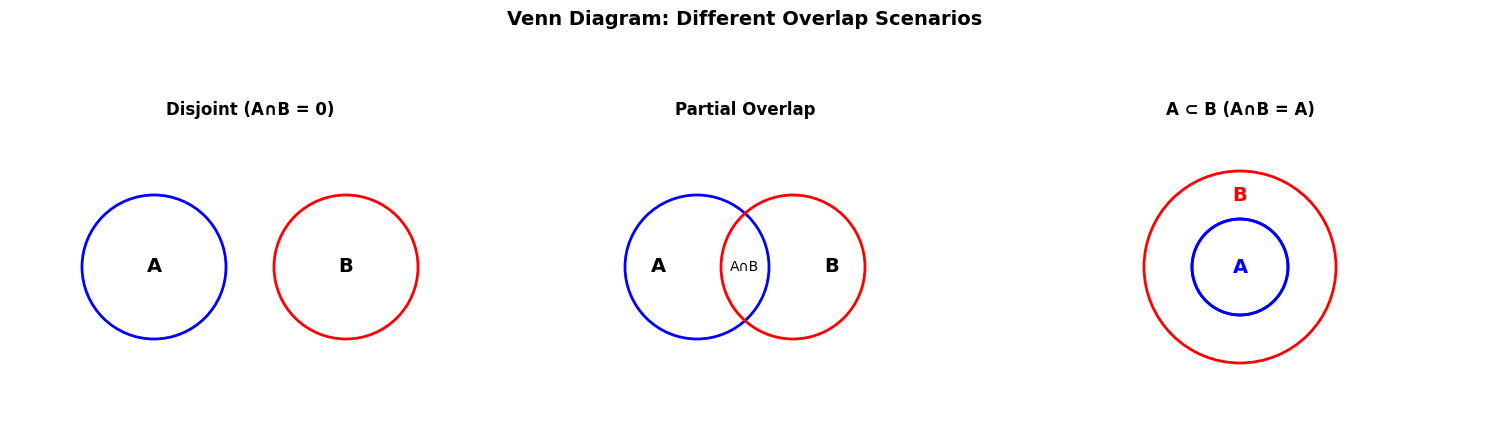


Graphical Interpretation:
  - Maximum overlap: A∩B = min{A, B} (one contains other)
  - Minimum overlap: A∩B = max{0, P(A)+P(B)-1}
  - Maximum union: A∪B approaches 1 when disjoint
  - Minimum union: A∪B = max{A, B} when one contains other


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

print("="*60)
print("EXERCISE 5: PROBABILITY BOUNDS")
print("="*60)

# Summary formulas
print("\nBounds on P(A ∪ B):")
print("  max{P(A), P(B)} ≤ P(A ∪ B) ≤ min{1, P(A) + P(B)}")

print("\nBounds on P(A ∩ B):")
print("  max{0, P(A) + P(B) - 1} ≤ P(A ∩ B) ≤ min{P(A), P(B)}")

# Examples
print("\n" + "-"*60)
print("Examples:")
print("-"*60)

examples = [(0.6, 0.4), (0.8, 0.7)]

for p_a, p_b in examples:
    union_lower = max(p_a, p_b)
    union_upper = min(1, p_a + p_b)
    inter_lower = max(0, p_a + p_b - 1)
    inter_upper = min(p_a, p_b)
    
    print(f"\nP(A) = {p_a}, P(B) = {p_b}")
    print(f"  Union:        {union_lower:.1f} ≤ P(A∪B) ≤ {union_upper:.1f}")
    print(f"  Intersection: {inter_lower:.1f} ≤ P(A∩B) ≤ {inter_upper:.1f}")

# Venn Diagram
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

titles = ['Disjoint (A∩B = 0)', 'Partial Overlap', 'A ⊂ B (A∩B = A)']
overlaps = [0, 0.5, 1]  # relative overlap

for idx, (ax, title, overlap) in enumerate(zip(axes, titles, overlaps)):
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(title, fontsize=12, fontweight='bold')
    
    # Draw circles
    if overlap == 0:  # Disjoint
        circle_a = patches.Circle((3, 3), 1.5, fill=False, edgecolor='blue', linewidth=2)
        circle_b = patches.Circle((7, 3), 1.5, fill=False, edgecolor='red', linewidth=2)
        ax.text(3, 3, 'A', ha='center', va='center', fontsize=14, fontweight='bold')
        ax.text(7, 3, 'B', ha='center', va='center', fontsize=14, fontweight='bold')
    elif overlap == 1:  # A ⊂ B
        circle_b = patches.Circle((5, 3), 2, fill=False, edgecolor='red', linewidth=2)
        circle_a = patches.Circle((5, 3), 1, fill=False, edgecolor='blue', linewidth=2)
        ax.text(5, 3, 'A', ha='center', va='center', fontsize=14, fontweight='bold', color='blue')
        ax.text(5, 4.5, 'B', ha='center', va='center', fontsize=14, fontweight='bold', color='red')
    else:  # Partial overlap
        circle_a = patches.Circle((4, 3), 1.5, fill=False, edgecolor='blue', linewidth=2)
        circle_b = patches.Circle((6, 3), 1.5, fill=False, edgecolor='red', linewidth=2)
        ax.text(3.2, 3, 'A', ha='center', va='center', fontsize=14, fontweight='bold')
        ax.text(6.8, 3, 'B', ha='center', va='center', fontsize=14, fontweight='bold')
        ax.text(5, 3, 'A∩B', ha='center', va='center', fontsize=10)
    
    ax.add_patch(circle_a if overlap != 1 else circle_b)
    ax.add_patch(circle_b if overlap != 1 else circle_a)
    if overlap == 1:
        ax.add_patch(patches.Circle((5, 3), 1, fill=False, edgecolor='blue', linewidth=2))

plt.suptitle('Venn Diagram: Different Overlap Scenarios', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Graphical Interpretation:")
print("  - Maximum overlap: A∩B = min{A, B} (one contains other)")
print("  - Minimum overlap: A∩B = max{0, P(A)+P(B)-1}")
print("  - Maximum union: A∪B approaches 1 when disjoint")
print("  - Minimum union: A∪B = max{A, B} when one contains other")
print("="*60)

## Exercise 6: Markov Chain Simplification

**Problem:** Assume we have random variables $A$, $B$, $C$ where $B$ only depends on $A$, and $C$ only depends on $B$. Simplify $P(A, B, C)$.

---

### Solution

**Given Structure:**
- $B$ only depends on $A$: $B \perp \text{(past)} \mid A$
- $C$ only depends on $B$: $C \perp A \mid B$

This is a **Markov chain**: $A \to B \to C$

**Derivation:**

**Step 1:** Start with chain rule:
$$P(A, B, C) = P(C \mid A, B) \cdot P(B \mid A) \cdot P(A)$$

**Step 2:** Apply Markov property ($C$ only depends on $B$, so given $B$, $C$ is independent of $A$):
$$P(C \mid A, B) = P(C \mid B)$$

**Step 3:** Substitute:

$$\boxed{P(A, B, C) = P(A) \cdot P(B \mid A) \cdot P(C \mid B)}$$

---

### Interpretation
- Start at $A$ with probability $P(A)$
- Transition to $B$ with probability $P(B \mid A)$
- Transition to $C$ with probability $P(C \mid B)$

The joint probability is the product of these transition probabilities.

In [36]:
import numpy as np

print("="*60)
print("EXERCISE 6: MARKOV CHAIN SIMPLIFICATION")
print("="*60)

print("\nAnswer: P(A,B,C) = P(A) · P(B|A) · P(C|B)")

# Example: Weather model A → B → C
print("\n" + "-"*60)
print("Example: Weather Model")
print("-"*60)

p_A = 0.7           # P(A = Sunny)
p_B_given_A = 0.8   # P(B = Sunny | A = Sunny)
p_C_given_B = 0.75  # P(C = Sunny | B = Sunny)

p_ABC = p_A * p_B_given_A * p_C_given_B

print(f"P(A = Sunny) = {p_A}")
print(f"P(B = Sunny | A = Sunny) = {p_B_given_A}")
print(f"P(C = Sunny | B = Sunny) = {p_C_given_B}")
print(f"\nP(All Sunny) = {p_A} × {p_B_given_A} × {p_C_given_B} = {p_ABC}")
print("="*60)

EXERCISE 6: MARKOV CHAIN SIMPLIFICATION

Answer: P(A,B,C) = P(A) · P(B|A) · P(C|B)

------------------------------------------------------------
Example: Weather Model
------------------------------------------------------------
P(A = Sunny) = 0.7
P(B = Sunny | A = Sunny) = 0.8
P(C = Sunny | B = Sunny) = 0.75

P(All Sunny) = 0.7 × 0.8 × 0.75 = 0.41999999999999993



## Exercise 7: Medical Testing with Conditional Dependence

**Problem (D2L 2.6.5):** Assume the two tests are not independent.

**Given:**
- False positive rate: $P(D = 1 \mid H = 0) = 0.10$ (10%)
- False negative rate: $P(D = 0 \mid H = 1) = 0.01$ (1%)
- Sensitivity: $P(D = 1 \mid H = 1) = 0.99$ (99%)
- For **infected** ($H = 1$): tests are conditionally **independent**
- For **healthy** ($H = 0$): tests are **coupled** with $P(D_1 = D_2 = 1 \mid H = 0) = 0.02$
- Baseline: $P(H = 1) = 0.0015$

---

### Part (a): Joint Probability Table for $D_1, D_2$ given $H = 0$

**Step 1:** Marginal probabilities for $D_1$ given $H = 0$:
$$P(D_1 = 1 \mid H = 0) = 0.10, \quad P(D_1 = 0 \mid H = 0) = 0.90$$

**Step 2:** We know $P(D_1 = 1, D_2 = 1 \mid H = 0) = 0.02$ (given)

**Step 3:** Find remaining joint probabilities:

$$P(D_1 = 1, D_2 = 0 \mid H = 0) = P(D_1 = 1 \mid H = 0) - P(D_1 = 1, D_2 = 1 \mid H = 0) = 0.10 - 0.02 = 0.08$$

By symmetry, $P(D_2 = 1 \mid H = 0) = 0.10$ (same false positive rate):

$$P(D_1 = 0, D_2 = 1 \mid H = 0) = P(D_2 = 1 \mid H = 0) - P(D_1 = 1, D_2 = 1 \mid H = 0) = 0.10 - 0.02 = 0.08$$

$$P(D_1 = 0, D_2 = 0 \mid H = 0) = 1 - 0.02 - 0.08 - 0.08 = 0.82$$

**Joint Probability Table:**

|  | $D_2 = 0$ | $D_2 = 1$ | Marginal |
|--|-----------|-----------|----------|
| $D_1 = 0$ | 0.82 | 0.08 | 0.90 |
| $D_1 = 1$ | 0.08 | 0.02 | 0.10 |
| **Marginal** | 0.90 | 0.10 | 1.00 |

---

### Part (b): $P(H = 1 \mid D_1 = 1)$

Using Bayes' Theorem:
$$P(H = 1 \mid D_1 = 1) = \frac{P(D_1 = 1 \mid H = 1) \cdot P(H = 1)}{P(D_1 = 1)}$$

**Compute $P(D_1 = 1)$:**
$$P(D_1 = 1) = P(D_1 = 1 \mid H = 1) \cdot P(H = 1) + P(D_1 = 1 \mid H = 0) \cdot P(H = 0)$$
$$= 0.99 \times 0.0015 + 0.10 \times 0.9985 = 0.001485 + 0.09985 = 0.101335$$

**Apply Bayes:**
$$P(H = 1 \mid D_1 = 1) = \frac{0.99 \times 0.0015}{0.101335} = \frac{0.001485}{0.101335} \approx 0.0147 = 1.47\%$$

---

### Part (c): $P(H = 1 \mid D_1 = 1, D_2 = 1)$

**For $H = 1$ (infected, tests independent):**
$$P(D_1 = 1, D_2 = 1 \mid H = 1) = P(D_1 = 1 \mid H = 1) \times P(D_2 = 1 \mid H = 1) = 0.99 \times 0.99 = 0.9801$$

**For $H = 0$ (healthy, from table):**
$$P(D_1 = 1, D_2 = 1 \mid H = 0) = 0.02$$

**Compute $P(D_1 = 1, D_2 = 1)$:**
$$P(D_1 = 1, D_2 = 1) = P(D_1 = 1, D_2 = 1 \mid H = 1) \cdot P(H = 1) + P(D_1 = 1, D_2 = 1 \mid H = 0) \cdot P(H = 0)$$
$$= 0.9801 \times 0.0015 + 0.02 \times 0.9985 = 0.00147015 + 0.01997 = 0.02144015$$

**Apply Bayes:**
$$P(H = 1 \mid D_1 = 1, D_2 = 1) = \frac{P(D_1 = 1, D_2 = 1 \mid H = 1) \cdot P(H = 1)}{P(D_1 = 1, D_2 = 1)}$$
$$= \frac{0.00147015}{0.02144015} \approx 0.0686 = 6.86\% \approx 6.8\%$$

---

### Comparison: Coupled vs Independent

| Scenario | P(Disease \| Evidence) |
|----------|------------------------|
| One positive test | 1.47% |
| Both positive (COUPLED) | **6.8%** |
| Both positive (INDEPENDENT) | **~83%** |

**Key Insight:** Conditional dependence (coupling) significantly reduces the evidential value of the second test! 

When both tests use similar mechanisms, false positives tend to occur together. This means the second positive test provides much less new information than if the tests were independent.

**Intuition:** If one test gives a false positive, the other is likely to give a false positive too due to coupling → greatly reduces diagnostic confidence.


In [37]:
import numpy as np

print("="*60)
print("EXERCISE 7: MEDICAL TESTING WITH CONDITIONAL DEPENDENCE")
print("="*60)

# Given data (from D2L 2.6.5)
p_disease = 0.0015  # P(H=1)
p_healthy = 1 - p_disease  # P(H=0)

# Test characteristics
false_positive = 0.10  # P(D=1 | H=0)
false_negative = 0.01  # P(D=0 | H=1)
sensitivity = 1 - false_negative  # P(D=1 | H=1) = 0.99

# Conditional dependence for healthy patients (COUPLING)
p_d1_d2_given_h0 = 0.02  # P(D1=1, D2=1 | H=0) - GIVEN IN PROBLEM

# Part (a): Joint probability table for H=0
print("\nPart (a): Joint Probability Table P(D1, D2 | H=0)")
print("-"*60)

p_d1_1_h0 = false_positive  # 0.10
p_d1_0_h0 = 1 - false_positive  # 0.90
p_d2_1_h0 = false_positive  # 0.10 (by symmetry)

# Calculate joint probabilities
p_11 = p_d1_d2_given_h0  # 0.02 (given)
p_10 = p_d1_1_h0 - p_11  # 0.10 - 0.02 = 0.08
p_01 = p_d2_1_h0 - p_11  # 0.10 - 0.02 = 0.08
p_00 = 1 - p_11 - p_10 - p_01  # 1 - 0.02 - 0.08 - 0.08 = 0.82

print(f"           D2=0      D2=1      Marginal")
print(f"D1=0      {p_00:.2f}      {p_01:.2f}      {p_d1_0_h0:.2f}")
print(f"D1=1      {p_10:.2f}      {p_11:.2f}      {p_d1_1_h0:.2f}")
print(f"Marginal  {p_00+p_10:.2f}      {p_01+p_11:.2f}      1.00")

# Verification
print(f"\nVerification: Sum = {p_00 + p_01 + p_10 + p_11:.2f}")

# Part (b): P(H=1 | D1=1)
print("\n" + "="*60)
print("Part (b): P(H=1 | D1=1)")
print("-"*60)

# Calculate P(D1=1) using law of total probability
p_d1_1 = sensitivity * p_disease + false_positive * p_healthy
print(f"P(D1=1) = P(D1=1|H=1)·P(H=1) + P(D1=1|H=0)·P(H=0)")
print(f"        = {sensitivity} × {p_disease} + {false_positive} × {p_healthy:.4f}")
print(f"        = {sensitivity * p_disease:.6f} + {false_positive * p_healthy:.6f}")
print(f"        = {p_d1_1:.6f}")

# Apply Bayes' theorem
p_h1_given_d1 = (sensitivity * p_disease) / p_d1_1
print(f"\nP(H=1 | D1=1) = P(D1=1|H=1)·P(H=1) / P(D1=1)")
print(f"              = {sensitivity * p_disease:.6f} / {p_d1_1:.6f}")
print(f"              = {p_h1_given_d1:.6f} = {p_h1_given_d1*100:.2f}%")

# Part (c): P(H=1 | D1=1, D2=1)
print("\n" + "="*60)
print("Part (c): P(H=1 | D1=1, D2=1)")
print("-"*60)

# For H=1 (infected): tests are independent
p_d1_d2_given_h1 = sensitivity * sensitivity  # 0.99 × 0.99 = 0.9801
print(f"P(D1=1, D2=1 | H=1) = {sensitivity} × {sensitivity} = {p_d1_d2_given_h1:.4f}")

# For H=0 (healthy): tests are coupled
print(f"P(D1=1, D2=1 | H=0) = {p_d1_d2_given_h0:.2f} (given - coupling)")

# Calculate P(D1=1, D2=1) using law of total probability
p_d1_d2 = p_d1_d2_given_h1 * p_disease + p_d1_d2_given_h0 * p_healthy
print(f"\nP(D1=1, D2=1) = {p_d1_d2_given_h1:.4f} × {p_disease} + {p_d1_d2_given_h0:.2f} × {p_healthy:.4f}")
print(f"              = {p_d1_d2_given_h1 * p_disease:.8f} + {p_d1_d2_given_h0 * p_healthy:.8f}")
print(f"              = {p_d1_d2:.8f}")

# Apply Bayes' theorem
p_h1_given_both = (p_d1_d2_given_h1 * p_disease) / p_d1_d2
print(f"\nP(H=1 | D1=1, D2=1) = {p_d1_d2_given_h1 * p_disease:.8f} / {p_d1_d2:.8f}")
print(f"                    = {p_h1_given_both:.6f} = {p_h1_given_both*100:.2f}%")

# Comparison with independent case
print("\n" + "="*60)
print("Comparison: Coupled vs Independent Tests")
print("-"*60)

# Calculate for independent case
p_d1_d2_given_h0_indep = false_positive * false_positive  # 0.10 × 0.10 = 0.01
p_d1_d2_indep = p_d1_d2_given_h1 * p_disease + p_d1_d2_given_h0_indep * p_healthy
p_h1_given_both_indep = (p_d1_d2_given_h1 * p_disease) / p_d1_d2_indep

print(f"{'Scenario':<35} {'P(Disease | Evidence)':<20}")
print("-"*60)
print(f"{'One positive test':<35} {p_h1_given_d1*100:>6.2f}%")
print(f"{'Both positive (COUPLED)':<35} {p_h1_given_both*100:>6.2f}%")
print(f"{'Both positive (INDEPENDENT)':<35} {p_h1_given_both_indep*100:>6.2f}%")

print("\n" + "="*60)
print("KEY INSIGHT:")
print("="*60)
print(f"Coupling reduces probability from {p_h1_given_both_indep*100:.1f}% → {p_h1_given_both*100:.1f}%")
print("When false positives occur together (coupling), the second test")
print("provides much LESS information than if tests were independent!")
print("="*60)

EXERCISE 7: MEDICAL TESTING WITH CONDITIONAL DEPENDENCE

Part (a): Joint Probability Table P(D1, D2 | H=0)
------------------------------------------------------------
           D2=0      D2=1      Marginal
D1=0      0.82      0.08      0.90
D1=1      0.08      0.02      0.10
Marginal  0.90      0.10      1.00

Verification: Sum = 1.00

Part (b): P(H=1 | D1=1)
------------------------------------------------------------
P(D1=1) = P(D1=1|H=1)·P(H=1) + P(D1=1|H=0)·P(H=0)
        = 0.99 × 0.0015 + 0.1 × 0.9985
        = 0.001485 + 0.099850
        = 0.101335

P(H=1 | D1=1) = P(D1=1|H=1)·P(H=1) / P(D1=1)
              = 0.001485 / 0.101335
              = 0.014654 = 1.47%

Part (c): P(H=1 | D1=1, D2=1)
------------------------------------------------------------
P(D1=1, D2=1 | H=1) = 0.99 × 0.99 = 0.9801
P(D1=1, D2=1 | H=0) = 0.02 (given - coupling)

P(D1=1, D2=1) = 0.9801 × 0.0015 + 0.02 × 0.9985
              = 0.00147015 + 0.01997000
              = 0.02144015

P(H=1 | D1=1, D2=1) = 0.

---

## Exercise 8: Portfolio Optimization

> "Portfolio optimization problem with stocks, returns, and covariance."

**Setup:**

Consider a portfolio with three assets:
- Asset A
- Asset B
- Asset C

**Given Data:**

**Expected Returns:**
- $\mu_A = 0.10$ (10% expected return)
- $\mu_B = 0.08$ (8% expected return)
- $\mu_C = 0.12$ (12% expected return)

**Covariance Matrix:**
$$\boldsymbol{\Sigma} = \begin{bmatrix}
0.04 & 0.01 & 0.02 \\
0.01 & 0.02 & 0.005 \\
0.02 & 0.005 & 0.06
\end{bmatrix}$$

**Portfolio Weights:** $\mathbf{w} = (w_A, w_B, w_C)^T$ where $w_A + w_B + w_C = 1$

---

### Part (a): Expected Return for a Given Portfolio

For a portfolio with weights $\mathbf{w}$, the expected return is:
$$E[R_p] = \mathbf{w}^T \boldsymbol{\mu} = w_A \mu_A + w_B \mu_B + w_C \mu_C$$

**Example:** For equal weights $\mathbf{w} = (1/3, 1/3, 1/3)^T$:
$$E[R_p] = \frac{1}{3}(0.10) + \frac{1}{3}(0.08) + \frac{1}{3}(0.12)$$
$$= \frac{1}{3}(0.30) = 0.10 = 10\%$$

**Answer:** Expected return is **10%** for equal-weighted portfolio.

---

### Part (b): Maximum Return Portfolio

To maximize return without constraints on risk:
$$\max_{\mathbf{w}} \quad \mathbf{w}^T \boldsymbol{\mu}$$
$$\text{subject to} \quad \mathbf{w}^T \mathbf{1} = 1$$

**Solution:**

Since Asset C has the highest expected return (12%), allocate all weight to Asset C:
$$\mathbf{w}^* = (0, 0, 1)^T$$

**Maximum Expected Return:**
$$E[R_p^*] = 0 \cdot 0.10 + 0 \cdot 0.08 + 1 \cdot 0.12 = 0.12 = 12\%$$

**Answer:** Invest 100% in Asset C for maximum return of **12%**.

**Caveat:** This ignores risk completely - Asset C may have high variance.

---

### Part (c): Variance of the Portfolio

For portfolio with weights $\mathbf{w}$, variance is:
$$\text{Var}[R_p] = \mathbf{w}^T \boldsymbol{\Sigma} \mathbf{w}$$

Expanding:
$$= \sum_{i,j} w_i w_j \Sigma_{ij}$$

**Example 1: Equal-weighted portfolio** $\mathbf{w} = (1/3, 1/3, 1/3)^T$:

$$\text{Var}[R_p] = \mathbf{w}^T \boldsymbol{\Sigma} \mathbf{w}$$

Computing step-by-step:
$$\boldsymbol{\Sigma} \mathbf{w} = \begin{bmatrix}
0.04 & 0.01 & 0.02 \\
0.01 & 0.02 & 0.005 \\
0.02 & 0.005 & 0.06
\end{bmatrix} \begin{bmatrix} 1/3 \\ 1/3 \\ 1/3 \end{bmatrix} = \begin{bmatrix} 0.0233 \\ 0.0117 \\ 0.0283 \end{bmatrix}$$

$$\mathbf{w}^T (\boldsymbol{\Sigma} \mathbf{w}) = \frac{1}{3}(0.0233 + 0.0117 + 0.0283) = \frac{0.0633}{3} = 0.0211$$

**Answer:** Variance = **0.0211** (standard deviation = **14.5%**)

**Example 2: Maximum return portfolio** $\mathbf{w} = (0, 0, 1)^T$:

$$\text{Var}[R_p] = 1^2 \cdot \Sigma_{CC} = 0.06$$

**Answer:** Variance = **0.06** (standard deviation = **24.5%**)

The maximum return portfolio has much higher risk!

---

### Part (d): Constrained Optimization Problem

**Objective:** Maximize return while limiting risk.

**Formulation:**
$$\max_{\mathbf{w}} \quad \mathbf{w}^T \boldsymbol{\mu}$$
$$\text{subject to} \quad \mathbf{w}^T \boldsymbol{\Sigma} \mathbf{w} \leq \sigma_{\max}^2$$
$$\quad \quad \quad \quad \quad \mathbf{w}^T \mathbf{1} = 1$$
$$\quad \quad \quad \quad \quad w_i \geq 0 \quad \forall i$$

where $\sigma_{\max}^2$ is the maximum acceptable variance.

**Alternative Formulation (Risk-Adjusted Return):**
$$\max_{\mathbf{w}} \quad \mathbf{w}^T \boldsymbol{\mu} - \frac{\lambda}{2} \mathbf{w}^T \boldsymbol{\Sigma} \mathbf{w}$$
$$\text{subject to} \quad \mathbf{w}^T \mathbf{1} = 1$$

where $\lambda > 0$ is the risk aversion parameter.

**Interpretation:**
- $\lambda = 0$: No risk aversion (maximize return only)
- $\lambda \to \infty$: Extreme risk aversion (minimize variance only)
- Intermediate $\lambda$: Trade-off between return and risk

**Solution Method:**

This is a **quadratic programming** problem. The Lagrangian is:
$$\mathcal{L}(\mathbf{w}, \nu) = \mathbf{w}^T \boldsymbol{\mu} - \frac{\lambda}{2} \mathbf{w}^T \boldsymbol{\Sigma} \mathbf{w} - \nu(\mathbf{w}^T \mathbf{1} - 1)$$

Taking derivative with respect to $\mathbf{w}$ and setting to zero:
$$\boldsymbol{\mu} - \lambda \boldsymbol{\Sigma} \mathbf{w} - \nu \mathbf{1} = 0$$

Solving:
$$\mathbf{w}^* = \frac{1}{\lambda} \boldsymbol{\Sigma}^{-1}(\boldsymbol{\mu} - \nu \mathbf{1})$$

where $\nu$ is chosen to satisfy $\mathbf{w}^T \mathbf{1} = 1$.

**Efficient Frontier:**

The set of portfolios that maximize return for each level of risk forms the **efficient frontier**. Rational investors choose portfolios on this frontier.

EXERCISE 8: PORTFOLIO OPTIMIZATION

Given Data:
----------------------------------------------------------------------
Expected Returns: [0.1  0.08 0.12]

Covariance Matrix:
[[0.04  0.01  0.02 ]
 [0.01  0.02  0.005]
 [0.02  0.005 0.06 ]]

Part (a): Equal-Weighted Portfolio
----------------------------------------------------------------------
Weights: [0.33333333 0.33333333 0.33333333]
Expected Return: 0.1000 = 10.00%
Variance: 0.0211
Standard Deviation: 0.1453 = 14.53%

Part (b): Maximum Return Portfolio (No Risk Constraint)
----------------------------------------------------------------------
Optimal Allocation: 100% to Asset C
Weights: [0. 0. 1.]
Expected Return: 0.1200 = 12.00%
Variance: 0.0600
Standard Deviation: 0.2449 = 24.49%

Part (c): Variance Analysis for Different Portfolios
----------------------------------------------------------------------
Portfolio                           Return     Std Dev   
----------------------------------------------------------------------
E

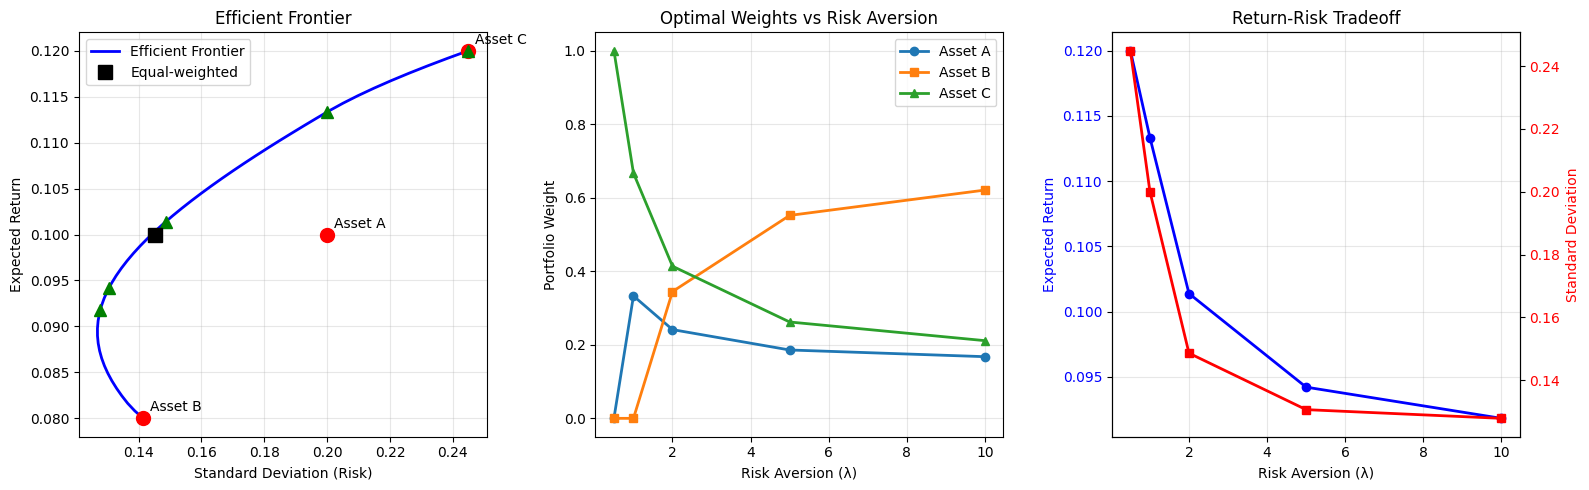


Key Insights:
- Higher risk aversion (λ) → Lower risk, lower return
- Efficient frontier shows optimal return for each risk level
- Diversification reduces risk compared to single-asset portfolios


In [38]:
# Exercise 8: Portfolio Optimization
from scipy.optimize import minimize

# Given data
mu = np.array([0.10, 0.08, 0.12])  # Expected returns
Sigma = np.array([
    [0.04, 0.01, 0.02],
    [0.01, 0.02, 0.005],
    [0.02, 0.005, 0.06]
])

asset_names = ['Asset A', 'Asset B', 'Asset C']

print("="*70)
print("EXERCISE 8: PORTFOLIO OPTIMIZATION")
print("="*70)

print("\nGiven Data:")
print("-"*70)
print(f"Expected Returns: {mu}")
print(f"\nCovariance Matrix:")
print(Sigma)

# Part (a): Equal-weighted portfolio
print("\n" + "="*70)
print("Part (a): Equal-Weighted Portfolio")
print("-"*70)

w_equal = np.array([1/3, 1/3, 1/3])
return_equal = w_equal @ mu
variance_equal = w_equal @ Sigma @ w_equal
std_equal = np.sqrt(variance_equal)

print(f"Weights: {w_equal}")
print(f"Expected Return: {return_equal:.4f} = {return_equal*100:.2f}%")
print(f"Variance: {variance_equal:.4f}")
print(f"Standard Deviation: {std_equal:.4f} = {std_equal*100:.2f}%")

# Part (b): Maximum return portfolio
print("\n" + "="*70)
print("Part (b): Maximum Return Portfolio (No Risk Constraint)")
print("-"*70)

max_return_idx = np.argmax(mu)
w_max_return = np.zeros(3)
w_max_return[max_return_idx] = 1.0

return_max = w_max_return @ mu
variance_max = w_max_return @ Sigma @ w_max_return
std_max = np.sqrt(variance_max)

print(f"Optimal Allocation: 100% to {asset_names[max_return_idx]}")
print(f"Weights: {w_max_return}")
print(f"Expected Return: {return_max:.4f} = {return_max*100:.2f}%")
print(f"Variance: {variance_max:.4f}")
print(f"Standard Deviation: {std_max:.4f} = {std_max*100:.2f}%")

# Part (c): Variance for different portfolios
print("\n" + "="*70)
print("Part (c): Variance Analysis for Different Portfolios")
print("-"*70)

portfolios = {
    'Equal-weighted': w_equal,
    'Max Return': w_max_return,
    'Conservative (50% B, 50% A)': np.array([0.5, 0.5, 0.0]),
    'Aggressive (50% C, 30% A, 20% B)': np.array([0.3, 0.2, 0.5])
}

print(f"{'Portfolio':<35} {'Return':<10} {'Std Dev':<10}")
print("-"*70)
for name, weights in portfolios.items():
    ret = weights @ mu
    std = np.sqrt(weights @ Sigma @ weights)
    print(f"{name:<35} {ret:8.2%}   {std:8.2%}")

# Part (d): Optimization with risk constraint
print("\n" + "="*70)
print("Part (d): Constrained Optimization - Efficient Frontier")
print("-"*70)

def portfolio_return(w):
    return -(w @ mu)  # Negative because we minimize

def portfolio_variance(w):
    return w @ Sigma @ w

# Constraint: weights sum to 1
constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]

# Bounds: weights between 0 and 1 (no short selling)
bounds = tuple((0, 1) for _ in range(3))

# Compute efficient frontier
target_returns = np.linspace(mu.min(), mu.max(), 50)
efficient_frontier_std = []
efficient_frontier_weights = []

for target_return in target_returns:
    # Minimize variance subject to target return
    constraints_with_return = constraints + [
        {'type': 'eq', 'fun': lambda w, tr=target_return: w @ mu - tr}
    ]
    
    result = minimize(portfolio_variance, x0=w_equal, method='SLSQP',
                     bounds=bounds, constraints=constraints_with_return)
    
    if result.success:
        efficient_frontier_std.append(np.sqrt(result.fun))
        efficient_frontier_weights.append(result.x)
    else:
        efficient_frontier_std.append(np.nan)
        efficient_frontier_weights.append(None)

efficient_frontier_std = np.array(efficient_frontier_std)

# Optimize for different risk aversion parameters
lambdas = [0.5, 1.0, 2.0, 5.0, 10.0]
optimal_portfolios = []

for lam in lambdas:
    # Maximize risk-adjusted return: return - (lambda/2)*variance
    def objective(w):
        return -(w @ mu - (lam/2) * (w @ Sigma @ w))
    
    result = minimize(objective, x0=w_equal, method='SLSQP',
                     bounds=bounds, constraints=constraints)
    
    if result.success:
        w_opt = result.x
        ret_opt = w_opt @ mu
        std_opt = np.sqrt(w_opt @ Sigma @ w_opt)
        optimal_portfolios.append((lam, w_opt, ret_opt, std_opt))

print("\nOptimal Portfolios for Different Risk Aversion Levels:")
print(f"{'Lambda':<8} {'Return':<10} {'Std Dev':<10} {'Weights (A, B, C)'}")
print("-"*70)
for lam, w, ret, std in optimal_portfolios:
    weights_str = f"({w[0]:.3f}, {w[1]:.3f}, {w[2]:.3f})"
    print(f"{lam:<8.1f} {ret:8.2%}   {std:8.2%}   {weights_str}")

# Visualization
fig = plt.figure(figsize=(16, 5))

# Plot 1: Efficient Frontier
ax1 = plt.subplot(1, 3, 1)

# Plot efficient frontier
valid_mask = ~np.isnan(efficient_frontier_std)
ax1.plot(efficient_frontier_std[valid_mask], target_returns[valid_mask], 
         'b-', linewidth=2, label='Efficient Frontier')

# Plot individual assets
for i, name in enumerate(asset_names):
    w_single = np.zeros(3)
    w_single[i] = 1.0
    ret_single = mu[i]
    std_single = np.sqrt(Sigma[i, i])
    ax1.plot(std_single, ret_single, 'ro', markersize=10)
    ax1.annotate(name, (std_single, ret_single), 
                xytext=(5, 5), textcoords='offset points')

# Plot example portfolios
for lam, w, ret, std in optimal_portfolios:
    ax1.plot(std, ret, 'g^', markersize=8)

ax1.plot(std_equal, return_equal, 'ks', markersize=10, label='Equal-weighted')

ax1.set_xlabel('Standard Deviation (Risk)')
ax1.set_ylabel('Expected Return')
ax1.set_title('Efficient Frontier')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Portfolio weights vs lambda
ax2 = plt.subplot(1, 3, 2)

lambdas_plot = [p[0] for p in optimal_portfolios]
weights_A = [p[1][0] for p in optimal_portfolios]
weights_B = [p[1][1] for p in optimal_portfolios]
weights_C = [p[1][2] for p in optimal_portfolios]

ax2.plot(lambdas_plot, weights_A, 'o-', label='Asset A', linewidth=2)
ax2.plot(lambdas_plot, weights_B, 's-', label='Asset B', linewidth=2)
ax2.plot(lambdas_plot, weights_C, '^-', label='Asset C', linewidth=2)

ax2.set_xlabel('Risk Aversion (λ)')
ax2.set_ylabel('Portfolio Weight')
ax2.set_title('Optimal Weights vs Risk Aversion')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Return vs Risk tradeoff
ax3 = plt.subplot(1, 3, 3)

returns_plot = [p[2] for p in optimal_portfolios]
stds_plot = [p[3] for p in optimal_portfolios]

ax3.plot(lambdas_plot, returns_plot, 'b-o', label='Expected Return', linewidth=2)
ax3.set_xlabel('Risk Aversion (λ)')
ax3.set_ylabel('Expected Return', color='b')
ax3.tick_params(axis='y', labelcolor='b')

ax3_twin = ax3.twinx()
ax3_twin.plot(lambdas_plot, stds_plot, 'r-s', label='Standard Deviation', linewidth=2)
ax3_twin.set_ylabel('Standard Deviation', color='r')
ax3_twin.tick_params(axis='y', labelcolor='r')

ax3.set_title('Return-Risk Tradeoff')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("Key Insights:")
print("- Higher risk aversion (λ) → Lower risk, lower return")
print("- Efficient frontier shows optimal return for each risk level")
print("- Diversification reduces risk compared to single-asset portfolios")
print("="*70)